# Machine Learning 2021-2022. Universitat de Barcelona

## Homework 02. IBM HR Analytics Employee Attrition & Performance Dataset.

Made by: Eric Duque, Arnau Gris and Angel Morales 

In this notebook we will explore the IBM HR Analytics Employee Attrition & Performance dataset, first loading the dataset and trying to understand the data. Then we will apply some machine learning models and techniques that we have learned during the course.

### Data analysis

First we load the full dataset and we can see the different columns.

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "ibm-hr-analytics-attrition-dataset"

We will load the strings as Factors, an R utility to manipulate categorical values easier.

In [2]:
df <- read.csv("../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv",stringsAsFactors = TRUE)
head(df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


In [3]:
length(df)

[1] 35

In [4]:
names(df)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"

We have 35 different features. We observe that some of them are categorical, and later we will have to decide what do we want to do with them in order to train the model. 

In [5]:
str(df)


'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ HourlyRate              : int  94 6

Using the summary method we can see some statistics of all the features, to have a better idea of the data shape.

In [6]:
summary(df)

      Age        Attrition            BusinessTravel   DailyRate     
 Min.   :18.00   No :1233   Non-Travel       : 150   Min.   : 102.0  
 1st Qu.:30.00   Yes: 237   Travel_Frequently: 277   1st Qu.: 465.0  
 Median :36.00              Travel_Rarely    :1043   Median : 802.0  
 Mean   :36.92                                       Mean   : 802.5  
 3rd Qu.:43.00                                       3rd Qu.:1157.0  
 Max.   :60.00                                       Max.   :1499.0  
                                                                     
                  Department  DistanceFromHome   Education    
 Human Resources       : 63   Min.   : 1.000   Min.   :1.000  
 Research & Development:961   1st Qu.: 2.000   1st Qu.:2.000  
 Sales                 :446   Median : 7.000   Median :3.000  
                              Mean   : 9.193   Mean   :2.913  
                              3rd Qu.:14.000   3rd Qu.:4.000  
                              Max.   :29.000   Max.   :5.000  

Now we will add histograms and boxplots of each column for the numerical values, and see the values distributin for the categorical ones.

- Age

In [7]:
options(repr.plot.width=6, repr.plot.height=6)

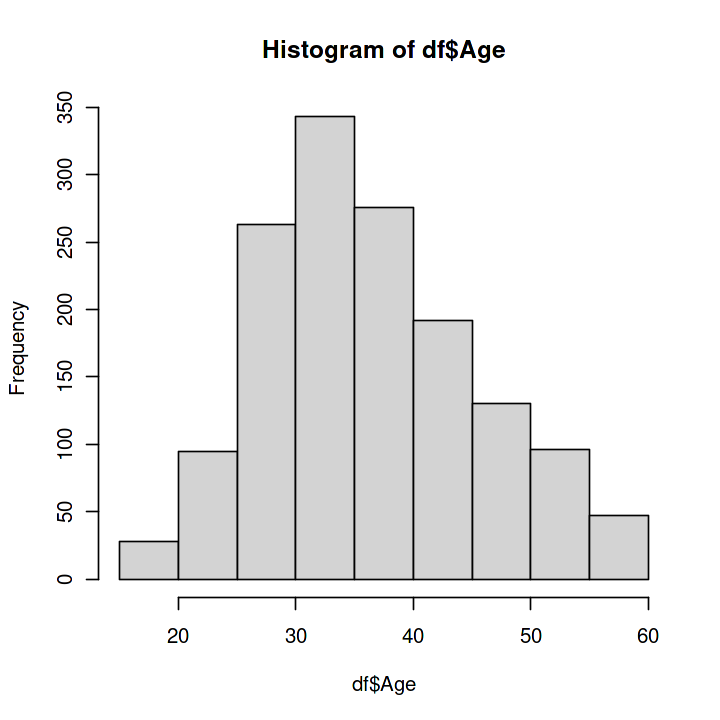

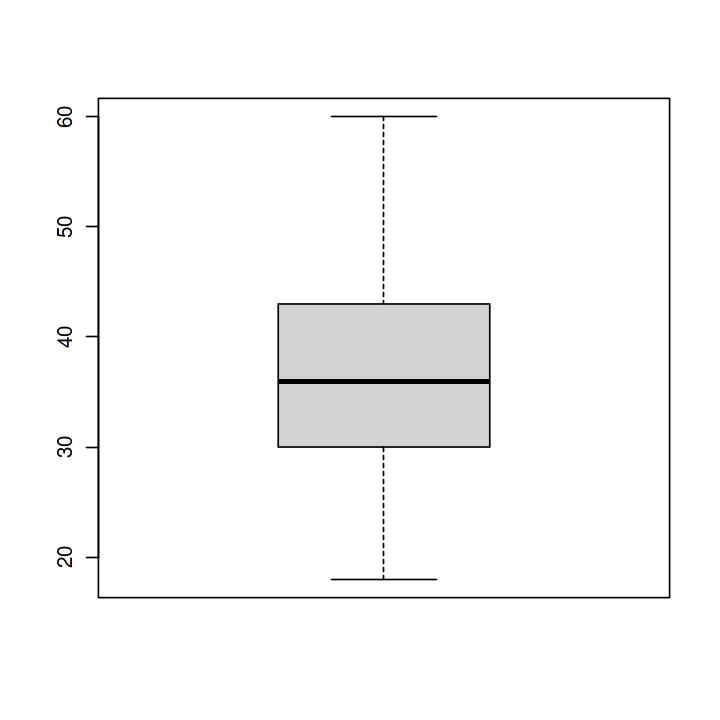

In [8]:
hist(df$Age)
boxplot(df$Age)

- Attrition

In [9]:
df %>% 
  select(Attrition) %>%
  group_by(Attrition) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

Attrition,N,percent
<fct>,<int>,<dbl>
No,1233,0.84
Yes,237,0.16


- BusinessTravel

In [10]:
df %>% 
  select(BusinessTravel) %>%
  group_by(BusinessTravel) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

BusinessTravel,N,percent
<fct>,<int>,<dbl>
Non-Travel,150,0.10
Travel_Frequently,277,0.19
Travel_Rarely,1043,0.71


- DailyRate

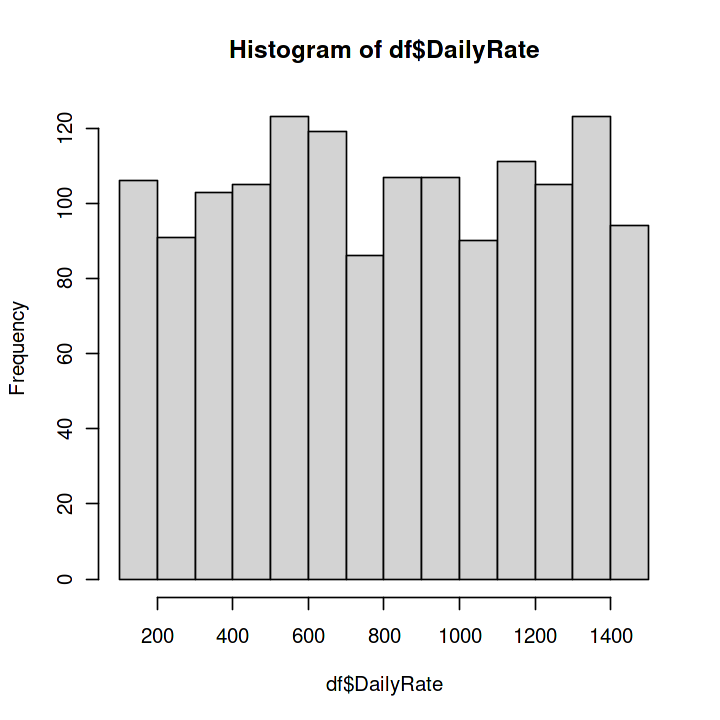

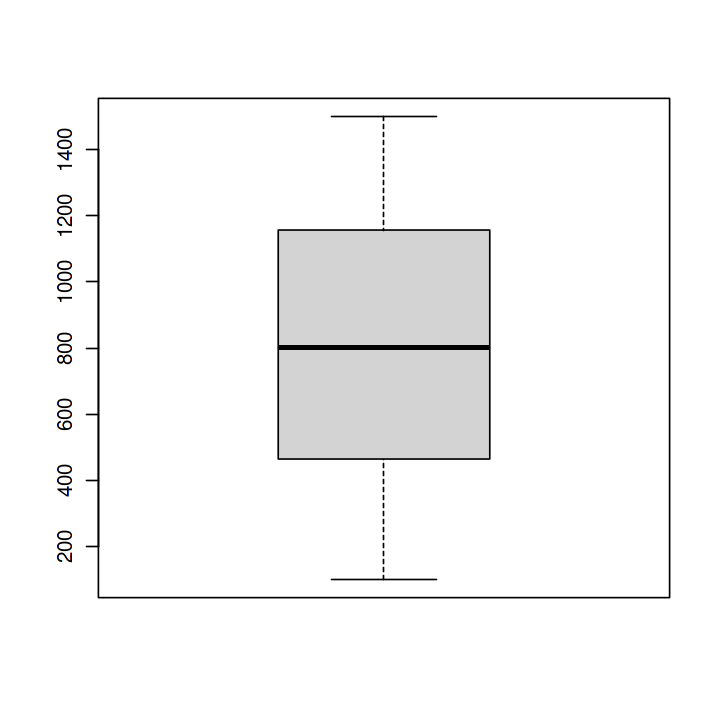

In [11]:
hist(df$DailyRate)
boxplot(df$DailyRate)

- Department

In [12]:
df %>% 
  select(Department) %>%
  group_by(Department) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

Department,N,percent
<fct>,<int>,<dbl>
Human Resources,63,0.04
Research & Development,961,0.65
Sales,446,0.30


- DistanceFromHome

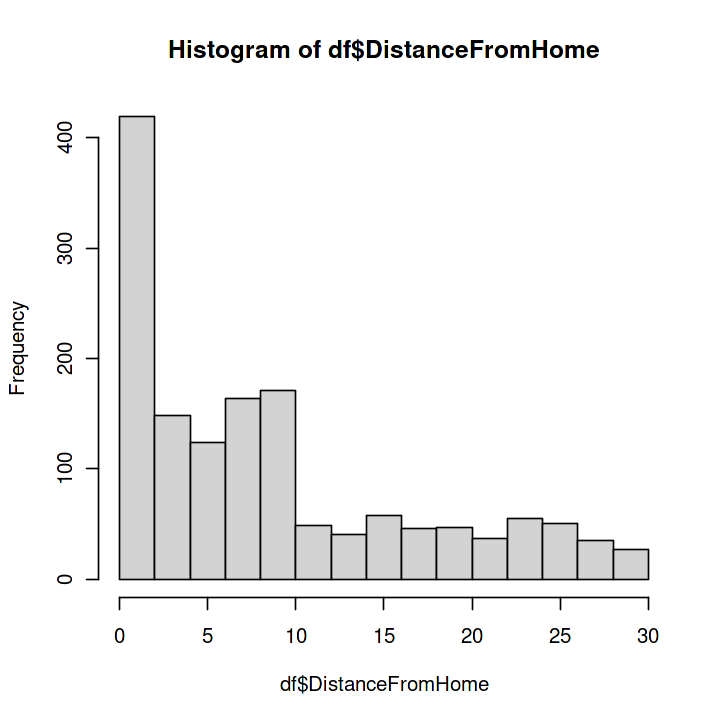

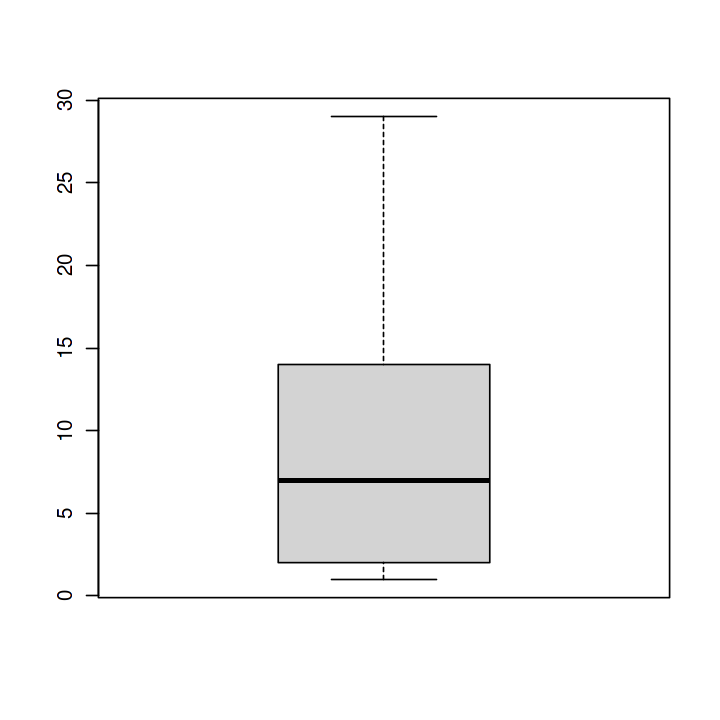

In [13]:
hist(df$DistanceFromHome)
boxplot(df$DistanceFromHome)

- Education

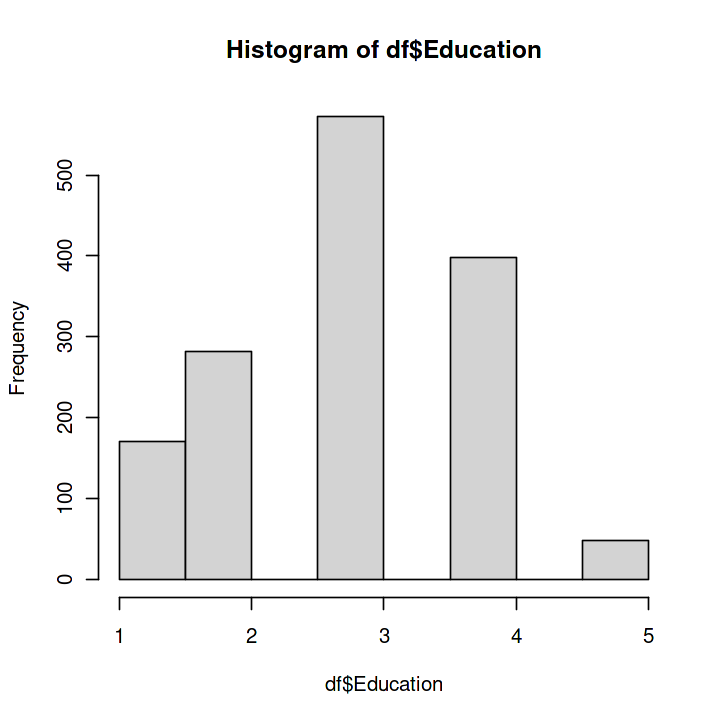

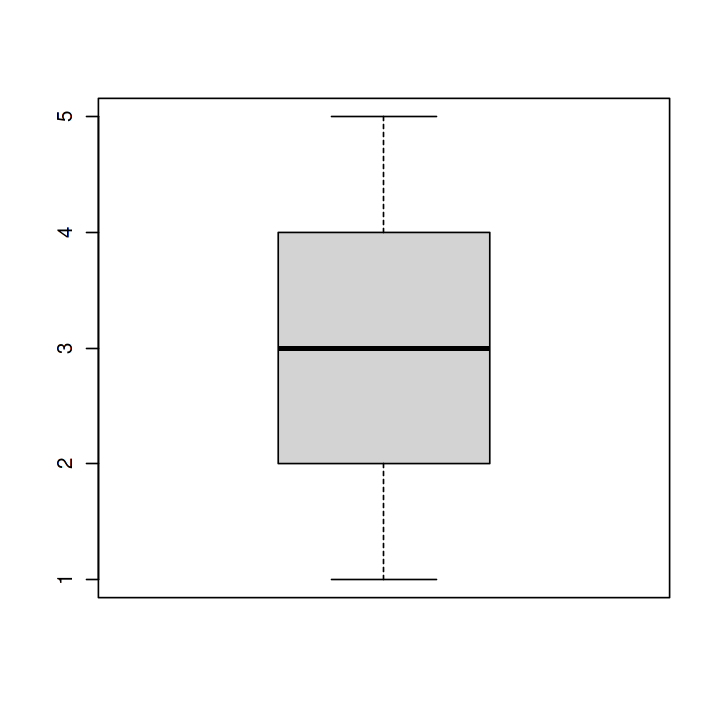

In [14]:
hist(df$Education)
boxplot(df$Education)

In [15]:
df %>% 
  select(Education) %>%
  group_by(Education) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

Education,N,percent
<int>,<int>,<dbl>
1,170,0.12
2,282,0.19
3,572,0.39
4,398,0.27
5,48,0.03


Eduaction is a numerical value that indicates (indeed the feature is categorical):

- 1 'Below College'
- 2 'College'
- 3 'Bachelor'
- 4 'Master'
- 5 'Doctor'

- EducationField

In [16]:
df %>% 
  select(EducationField) %>%
  group_by(EducationField) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

EducationField,N,percent
<fct>,<int>,<dbl>
Human Resources,27,0.02
Life Sciences,606,0.41
Marketing,159,0.11
Medical,464,0.32
Other,82,0.06
Technical Degree,132,0.09


- EmployeeCount

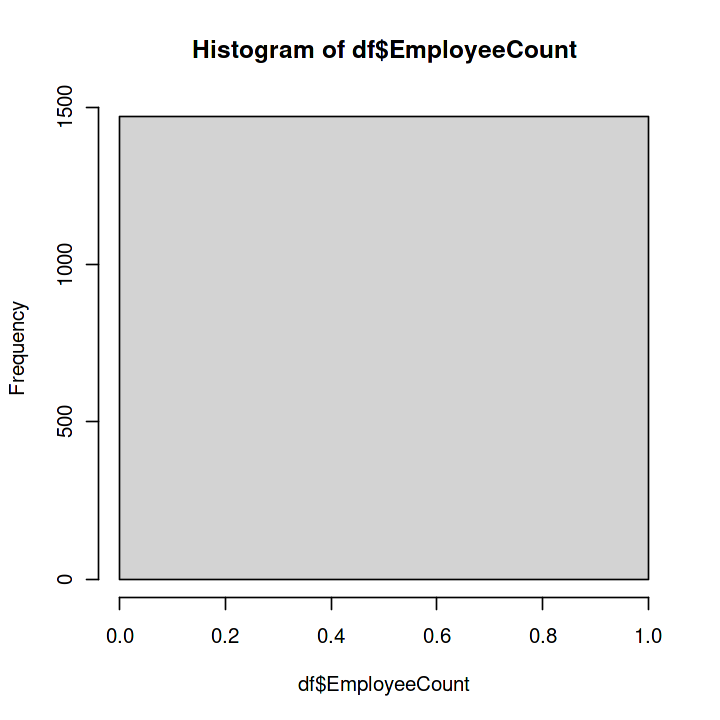

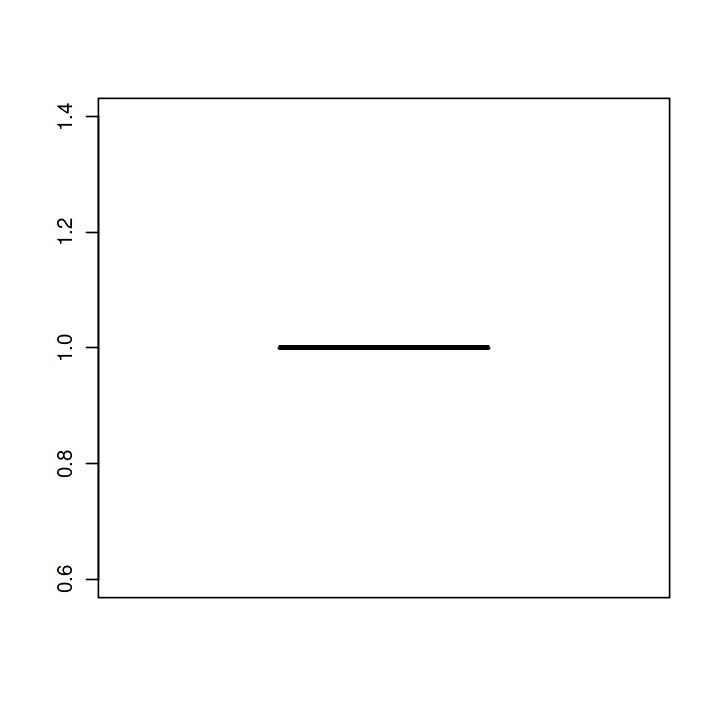

In [17]:
hist(df$EmployeeCount)
boxplot(df$EmployeeCount)

This feature has all ones.

- EmployeeNumber

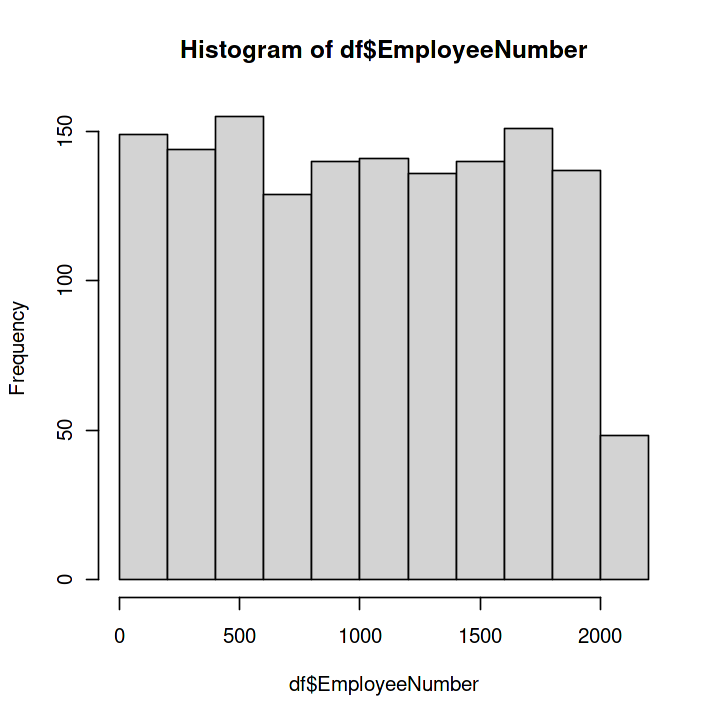

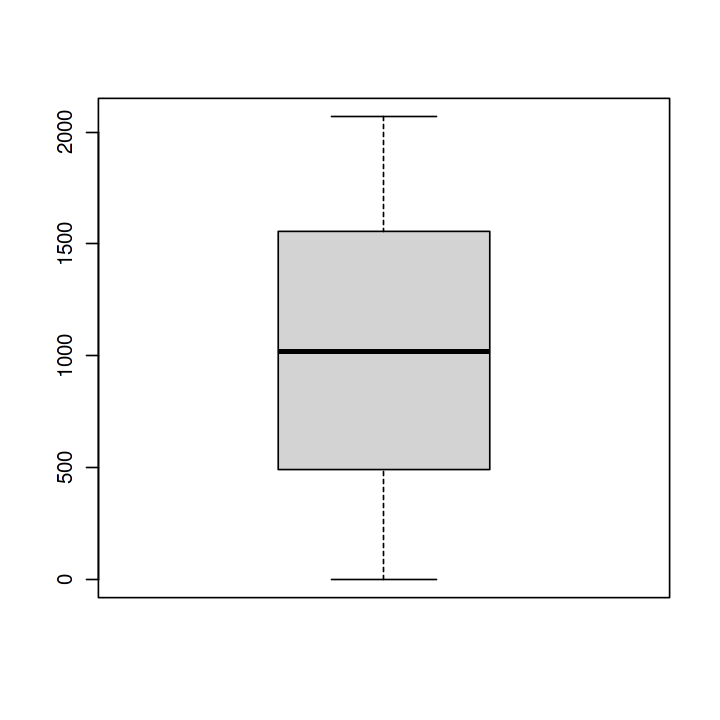

In [18]:
hist(df$EmployeeNumber)
boxplot(df$EmployeeNumber)

In [19]:
df$EmployeeNumber

[1]    1    2    4    5    7    8   10   11   12   13   14   15   16   18
  [15]   19   20   21   22   23   24   26   27   28   30   31   32   33   35
  [29]   36   38   39   40   41   42   45   46   47   49   51   52   53   54
  [43]   55   56   57   58   60   61   62   63   64   65   68   70   72   73
  [57]   74   75   76   77   78   79   80   81   83   84   85   86   88   90
  [71]   91   94   95   96   97   98  100  101  102  103  104  105  106  107
  [85]  110  112  113  116  117  118  119  120  121  124  125  126  128  129
  [99]  131  132  133  134  137  138  139  140  141  142  143  144  145  147
 [113]  148  150  151  152  153  154  155  158  159  160  161  162  163  164
 [127]  165  167  169  170  171  174  175  176  177  178  179  182  183  184
 [141]  190  192  193  194  195  197  198  199  200  201  202  204  205  206
 [155]  207  208  211  214  215  216  217  218  221  223  224  226  227  228
 [169]  230  231  233  235  238  239  240  241  242  243  244  245  246  247
 [183]  248  249  250  252  253  254  256  258  259  260  261  262  264  267
 [197]  269  270  271  273  274  275  277  281  282  283  284  286  287  288
 [211]  291  292  293  296  297  298  299  300  302  303  304  305  306  307
 [225]  308  309  311  312  314  315  316  319  321  323  325  327  328  329
 [239]  330  331  332  333  334  335  336  337  338  339  340  341  342  343
 [253]  346  347  349  350  351  352  353  355  359  361  362  363  364  366
 [267]  367  369  372  373  374  376  377  378  379  380  381  382  384  385
 [281]  386  387  388  389  390  391  392  393  394  395  396  397  399  401
 [295]  403  404  405  406  407  408  410  411  412  416  417  419  420  421
 [309]  422  423  424  425  426  428  429  430  431  433  434  436  437  438
 [323]  439  440  441  442  444  445  446  447  448  449  450  451  452  453
 [337]  454  455  456  458  460  461  462  463  464  465  466  467  468  469
 [351]  470  471  473  474  475  476  477  478  479  481  482  483  484  485
 [365]  486  487  488  491  492  493  494  495  496  497  498  499  500  501
 [379]  502  505  507  508  510  511  513  514  515  516  517  518  520  521
 [393]  522  523  524  525  526  527  529  530  531  532  533  534  536  538
 [407]  543  544  546  547  548  549  550  551  554  555  556  558  560  562
 [421]  564  565  566  567  568  569  571  573  574  575  577  578  579  580
 [435]  581  582  584  585  586  587  590  591  592  593  595  597  599  600
 [449]  601  602  604  605  606  608  611  612  613  614  615  616  618  620
 [463]  621  622  623  624  625  626  630  631  632  634  635  638  639  641
 [477]  643  644  645  647  648  649  650  652  653  655  656  657  659  661
 [491]  662  663  664  665  666  667  669  671  675  677  679  680  682  683
 [505]  684  686  689  690  691  692  698  699  700  701  702  704  705  707
 [519]  709  710  712  714  715  716  717  720  721  722  723  724  725  727
 [533]  728  729  730  731  732  733  734  738  741  742  743  744  746  747
 [547]  749  752  754  757  758  760  762  763  764  766  769  771  772  773
 [561]  775  776  780  781  783  784  785  786  787  789  791  792  793  796
 [575]  797  799  800  802  803  804  805  806  807  808  809  811  812  813
 [589]  815  816  817  819  820  823  824  825  826  827  828  829  830  832
 [603]  833  834  836  837  838  840  842  843  844  845  846  847  848  850
 [617]  851  852  854  855  856  857  859  861  862  864  865  867  868  869
 [631]  872  874  875  878  879  880  881  882  885  887  888  889  893  894
 [645]  895  896  897  899  900  901  902  903  904  905  909  910  911  912
 [659]  913  916  918  920  922  923  924  925  926  927  930  932  933  934
 [673]  936  939  940  941  942  944  945  947  949  950  951  952  954  956
 [687]  957  958  959  960  961  964  966  967  969  970  972  974  975  976
 [701]  977  981  982  983  984  985  986  987  990  991  992  994  995  996
 [715]  997  998  999 1001 1002 1003 1004 1005 1006 1007 1009 1010 1011 1012

EmployeeNumber is a identifier of the employee, it will not add any information to our models.

- EnvironmentSatisfaction

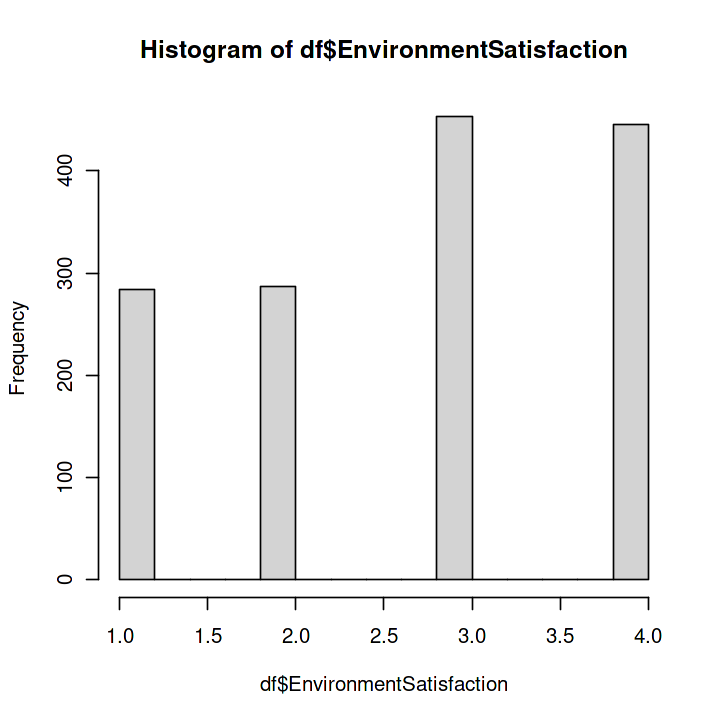

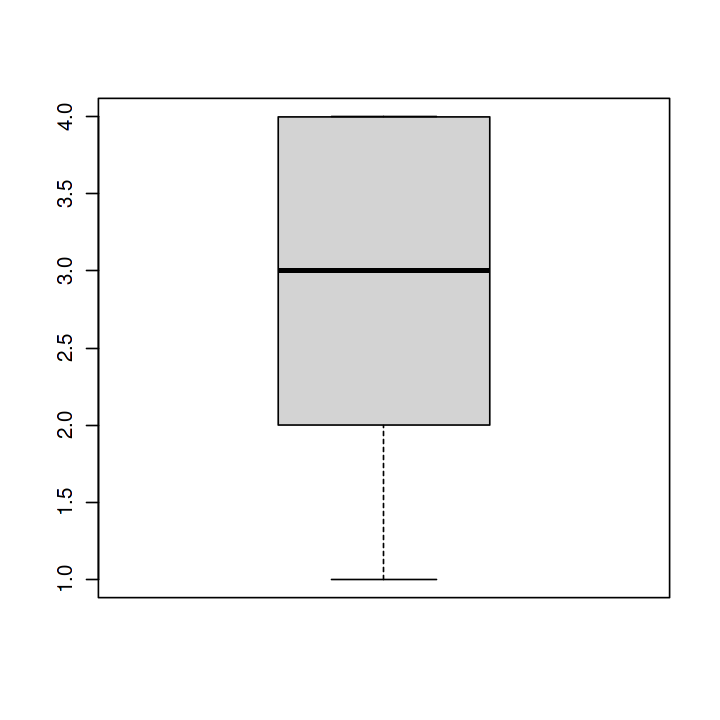

In [20]:
hist(df$EnvironmentSatisfaction)
boxplot(df$EnvironmentSatisfaction)

In [21]:
df %>% 
  select(EnvironmentSatisfaction) %>%
  group_by(EnvironmentSatisfaction) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

EnvironmentSatisfaction,N,percent
<int>,<int>,<dbl>
1,284,0.19
2,287,0.20
3,453,0.31
4,446,0.30


EnvironmentSatisfaction is a numerical value that indicates (indeed the feature is categorical):

- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

- Gender

In [22]:
df %>% 
  select(Gender) %>%
  group_by(Gender) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

Gender,N,percent
<fct>,<int>,<dbl>
Female,588,0.4
Male,882,0.6


- HourlyRate

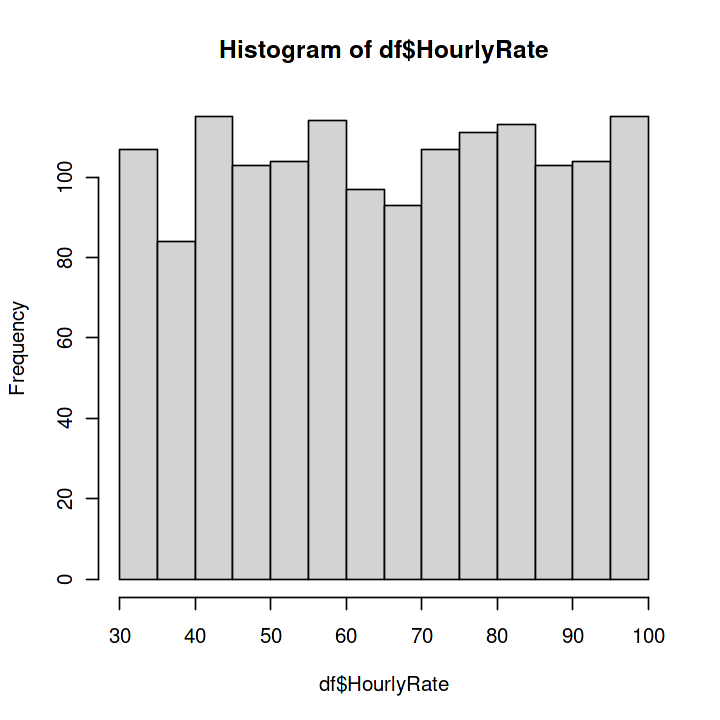

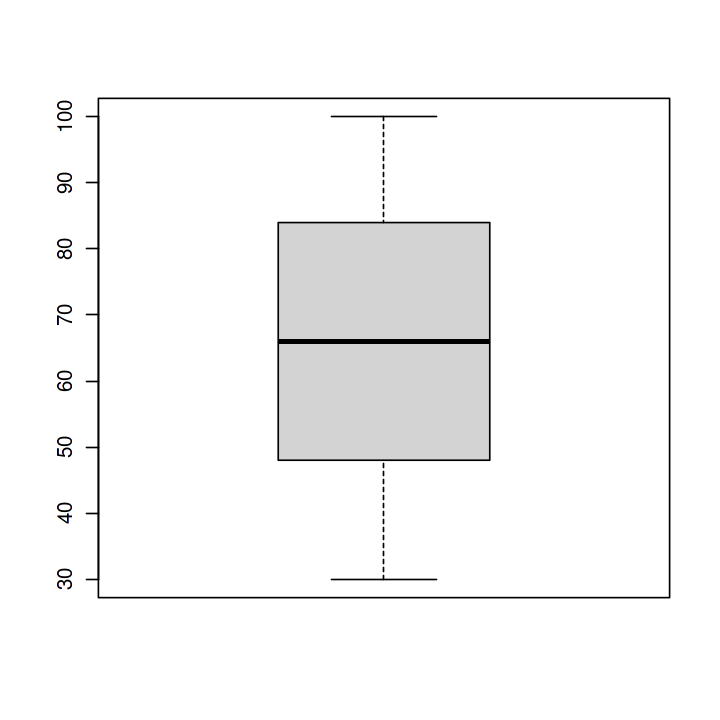

In [23]:
hist(df$HourlyRate)
boxplot(df$HourlyRate)

- JobInvolvement

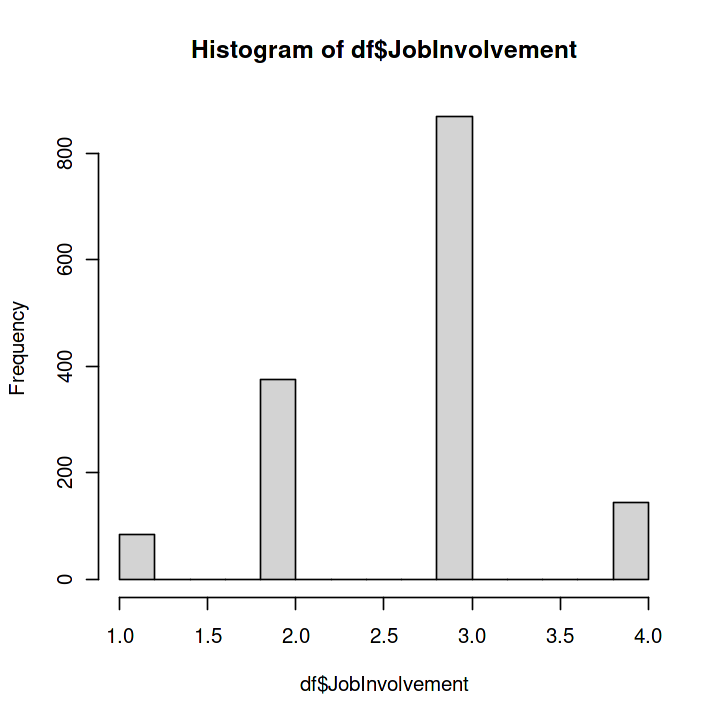

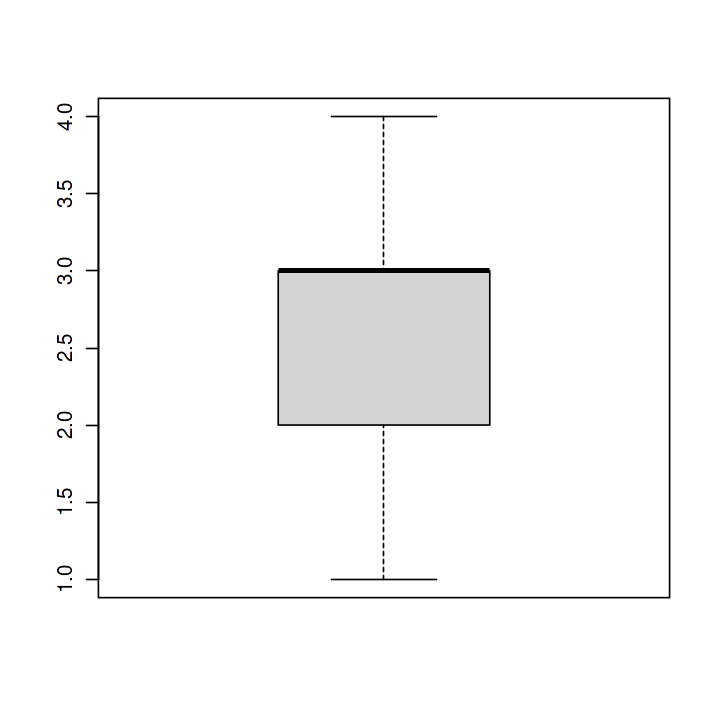

In [24]:
hist(df$JobInvolvement)
boxplot(df$JobInvolvement)

In [25]:
df %>% 
  select(JobInvolvement) %>%
  group_by(JobInvolvement) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

JobInvolvement,N,percent
<int>,<int>,<dbl>
1,83,0.06
2,375,0.26
3,868,0.59
4,144,0.10


JobInvolvement is a numerical value that indicates (indeed the feature is categorical):

- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

- JobLevel

In [26]:
df %>% 
  select(JobLevel) %>%
  group_by(JobLevel) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

JobLevel,N,percent
<int>,<int>,<dbl>
1,543,0.37
2,534,0.36
3,218,0.15
4,106,0.07
5,69,0.05


- JobRole

In [27]:
df %>% 
  select(JobRole) %>%
  group_by(JobRole) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

JobRole,N,percent
<fct>,<int>,<dbl>
Healthcare Representative,131,0.09
Human Resources,52,0.04
Laboratory Technician,259,0.18
Manager,102,0.07
Manufacturing Director,145,0.10
Research Director,80,0.05
Research Scientist,292,0.20
Sales Executive,326,0.22
Sales Representative,83,0.06


- JobSatisfaction

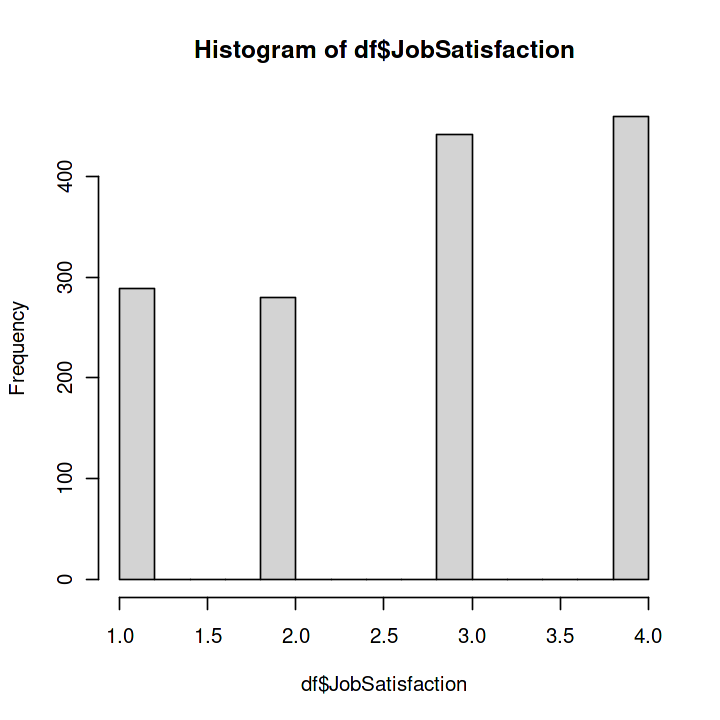

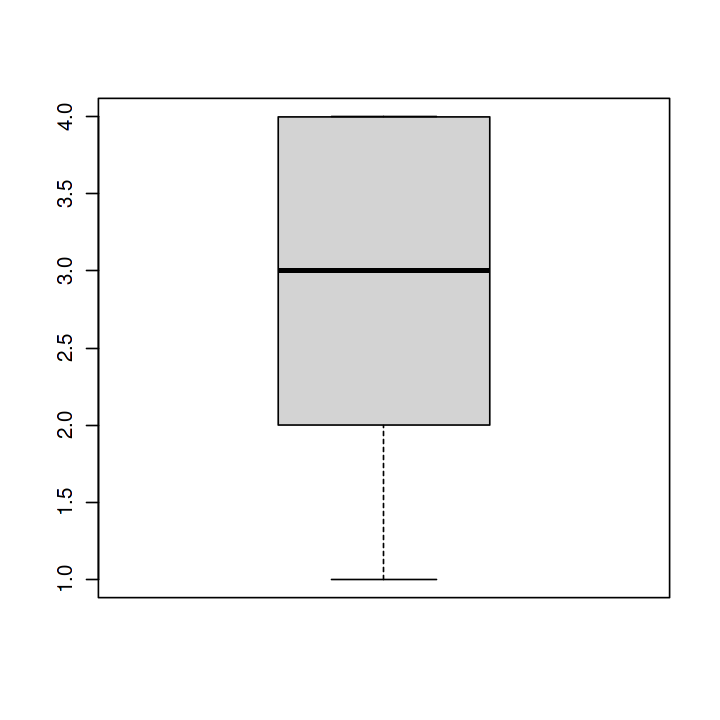

In [28]:
hist(df$JobSatisfaction)
boxplot(df$JobSatisfaction)

In [29]:
df %>% 
  select(JobSatisfaction) %>%
  group_by(JobSatisfaction) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

JobSatisfaction,N,percent
<int>,<int>,<dbl>
1,289,0.20
2,280,0.19
3,442,0.30
4,459,0.31


JobSatisfaction is a numerical value that indicates (indeed the feature is categorical):

- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

- MaritalStatus

In [30]:
df %>% 
  select(MaritalStatus) %>%
  group_by(MaritalStatus) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

MaritalStatus,N,percent
<fct>,<int>,<dbl>
Divorced,327,0.22
Married,673,0.46
Single,470,0.32


- MonthlyIncome

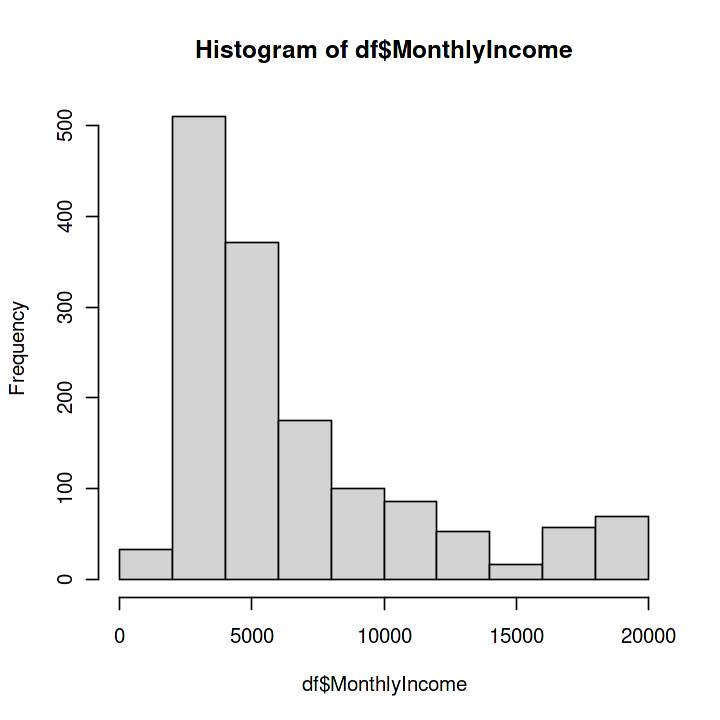

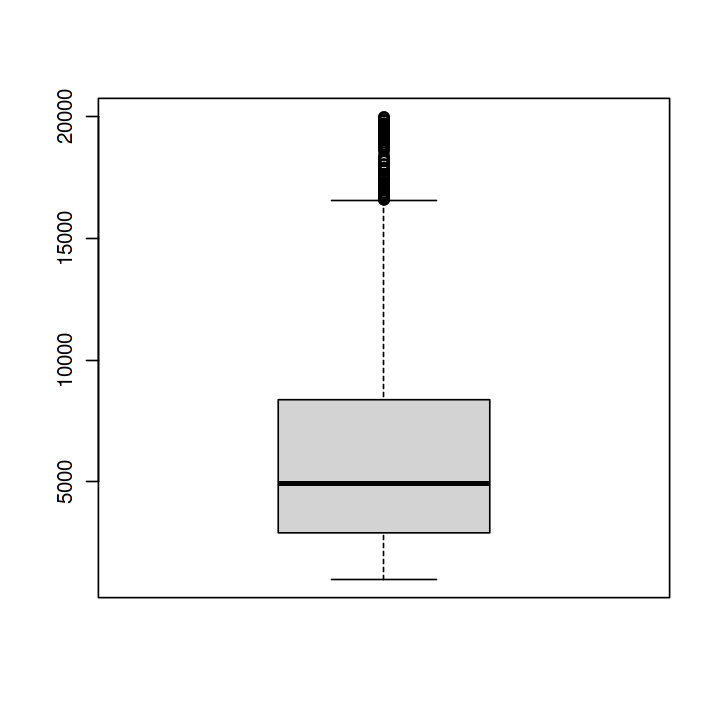

In [31]:
hist(df$MonthlyIncome)
boxplot(df$MonthlyIncome)

- MonthlyRate

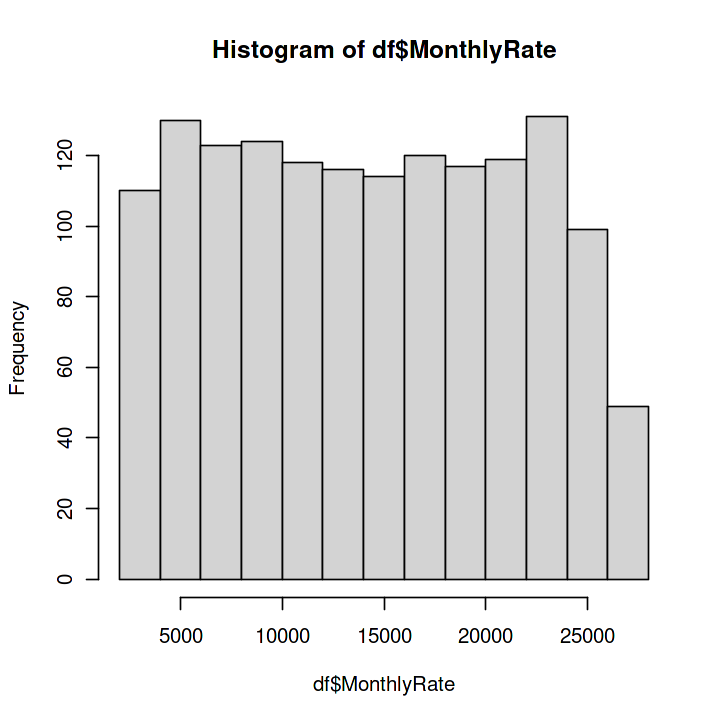

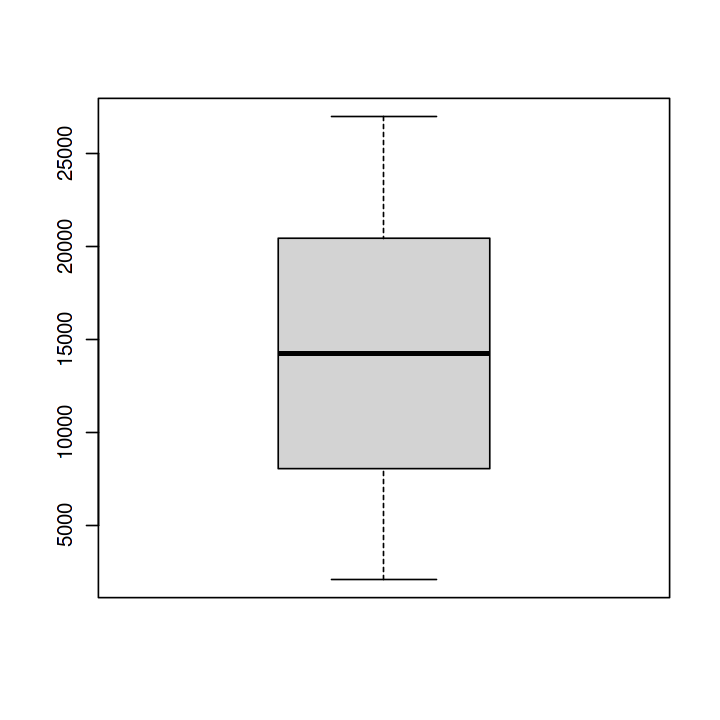

In [32]:
hist(df$MonthlyRate)
boxplot(df$MonthlyRate)

- NumCompaniesWorked

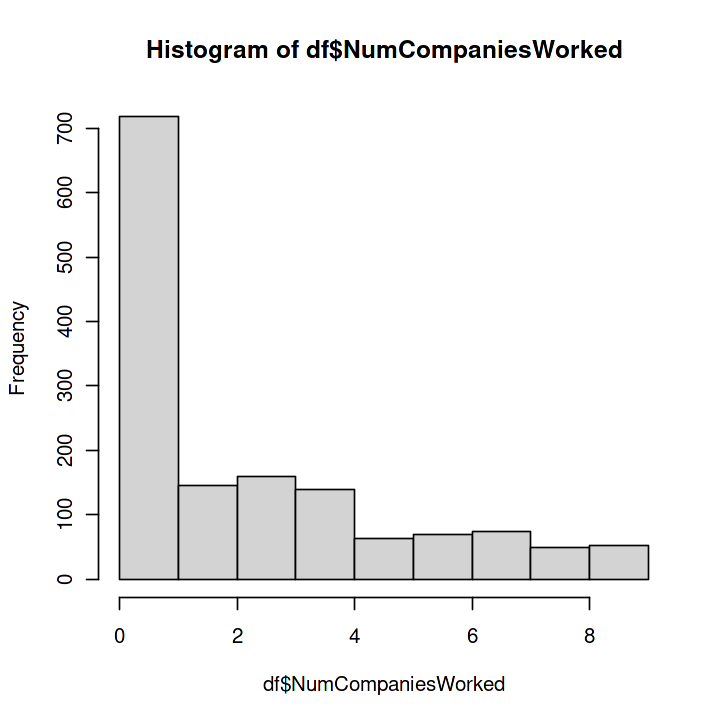

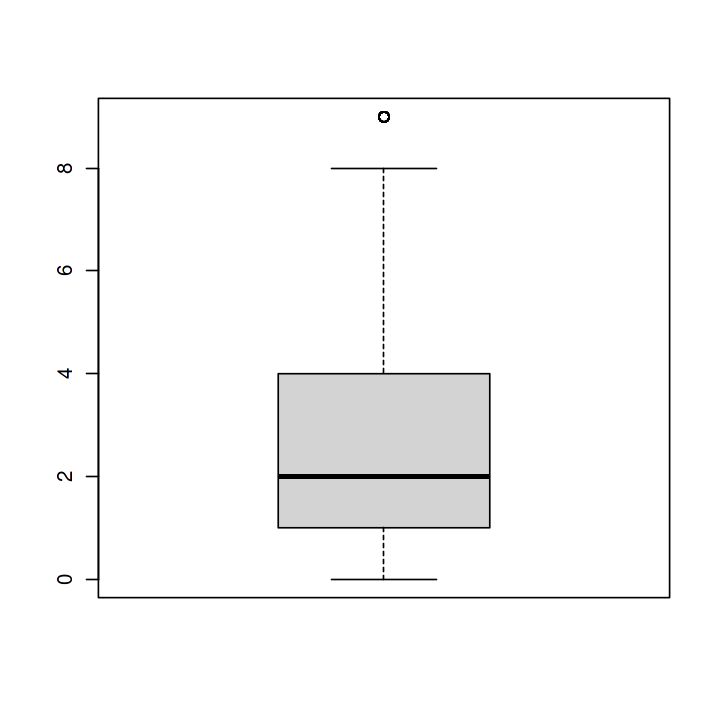

In [33]:
hist(df$NumCompaniesWorked)
boxplot(df$NumCompaniesWorked)

In [34]:
df %>% 
  select(NumCompaniesWorked) %>%
  group_by(NumCompaniesWorked) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

NumCompaniesWorked,N,percent
<int>,<int>,<dbl>
0,197,0.13
1,521,0.35
2,146,0.10
3,159,0.11
4,139,0.09
5,63,0.04
6,70,0.05
7,74,0.05
8,49,0.03


- Over18

In [35]:
df %>% 
  select(Over18) %>%
  group_by(Over18) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

Over18,N,percent
<fct>,<int>,<dbl>
Y,1470,1


- OverTime

In [36]:
df %>% 
  select(OverTime) %>%
  group_by(OverTime) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

OverTime,N,percent
<fct>,<int>,<dbl>
No,1054,0.72
Yes,416,0.28


- PercentSalaryHike

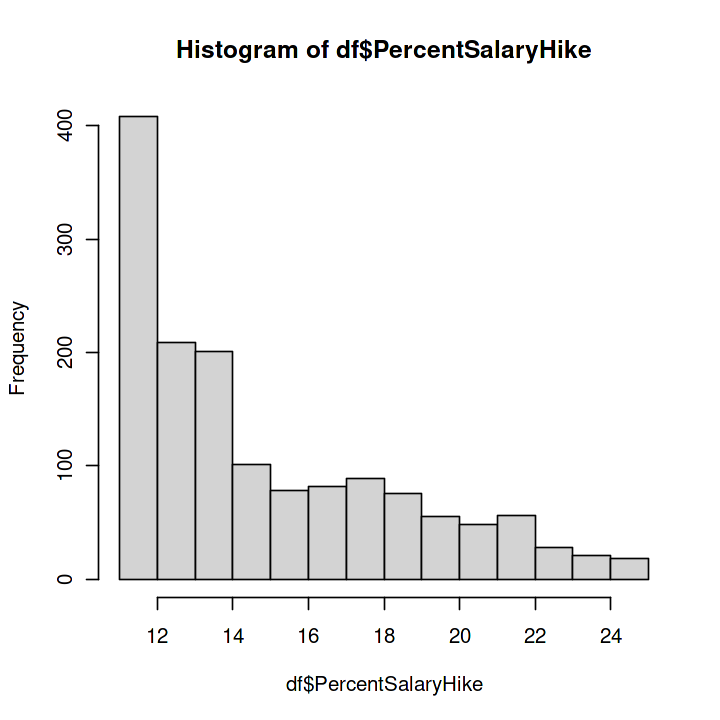

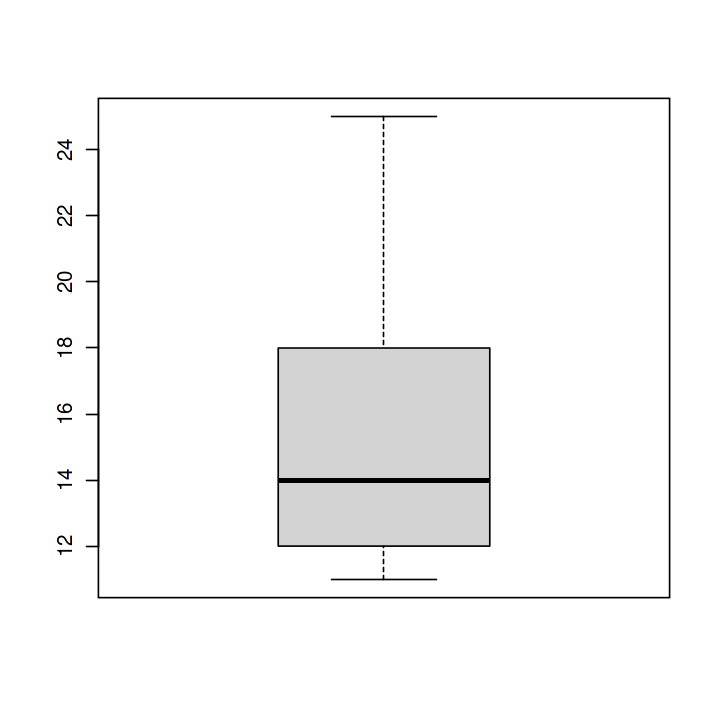

In [37]:
hist(df$PercentSalaryHike)
boxplot(df$PercentSalaryHike)

- PerformanceRating

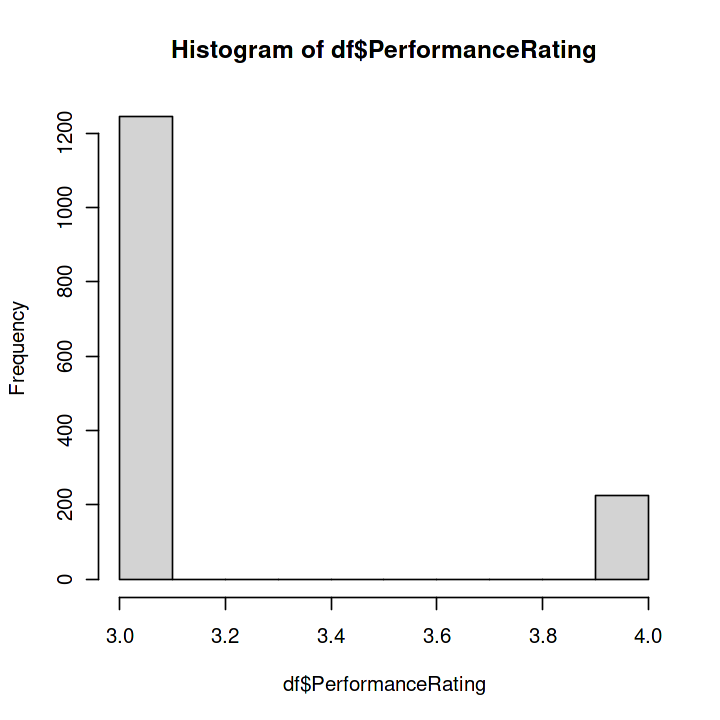

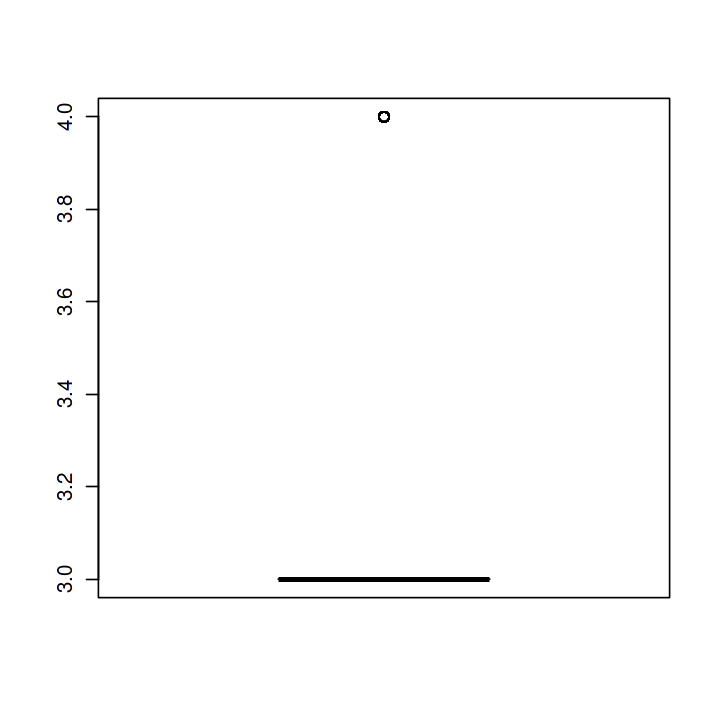

In [38]:
hist(df$PerformanceRating)
boxplot(df$PerformanceRating)

In [39]:
df %>% 
  select(PerformanceRating) %>%
  group_by(PerformanceRating) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

PerformanceRating,N,percent
<int>,<int>,<dbl>
3,1244,0.85
4,226,0.15


- RelationshipSatisfaction

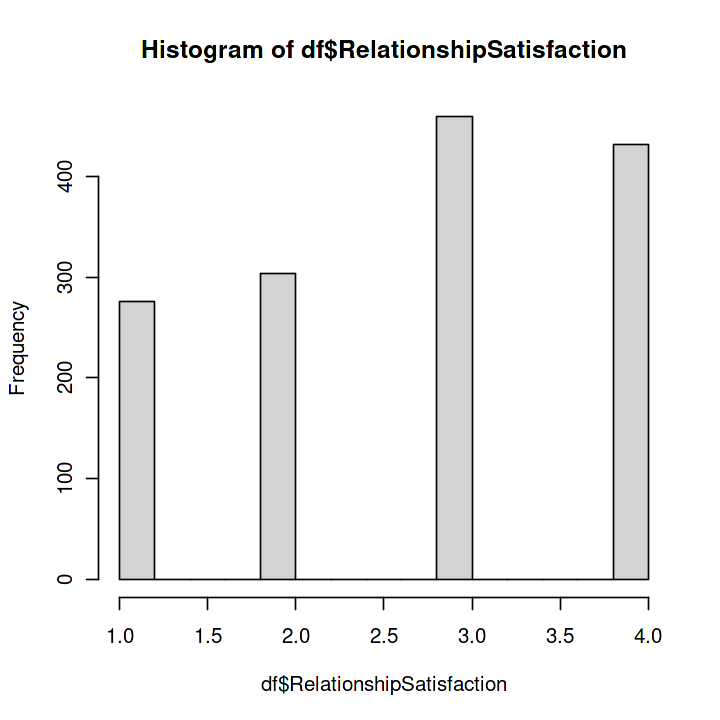

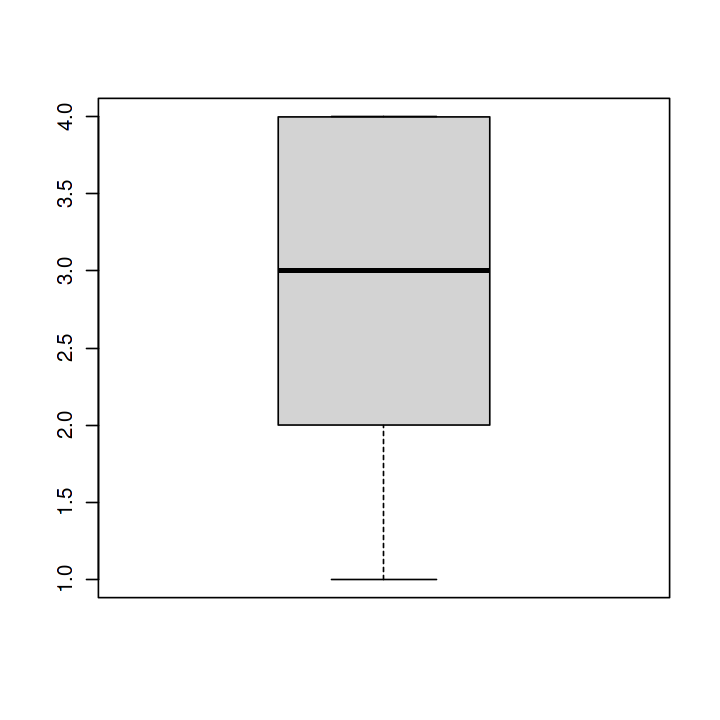

In [40]:
hist(df$RelationshipSatisfaction)
boxplot(df$RelationshipSatisfaction)

In [41]:
df %>% 
  select(RelationshipSatisfaction) %>%
  group_by(RelationshipSatisfaction) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

RelationshipSatisfaction,N,percent
<int>,<int>,<dbl>
1,276,0.19
2,303,0.21
3,459,0.31
4,432,0.29


RelationshipSatisfaction is a numerical value that indicates (indeed the feature is categorical):

- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

- StandardHours

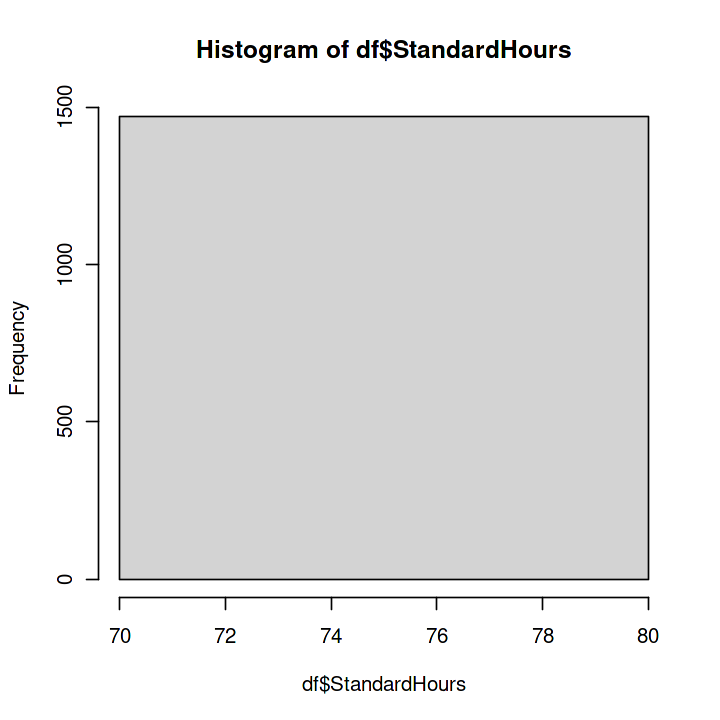

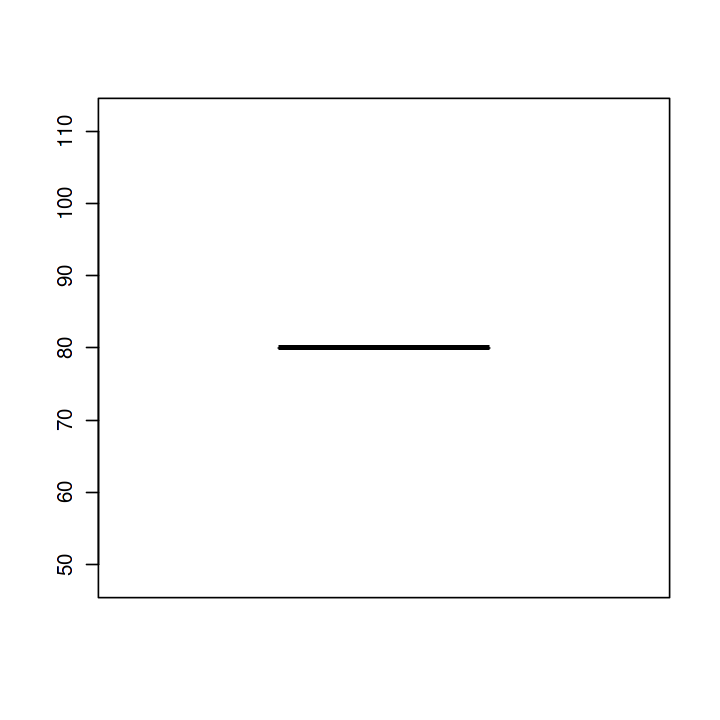

In [42]:
hist(df$StandardHours)
boxplot(df$StandardHours)

In [43]:
df %>% 
  select(StandardHours) %>%
  group_by(StandardHours) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

StandardHours,N,percent
<int>,<int>,<dbl>
80,1470,1


- StockOptionLevel

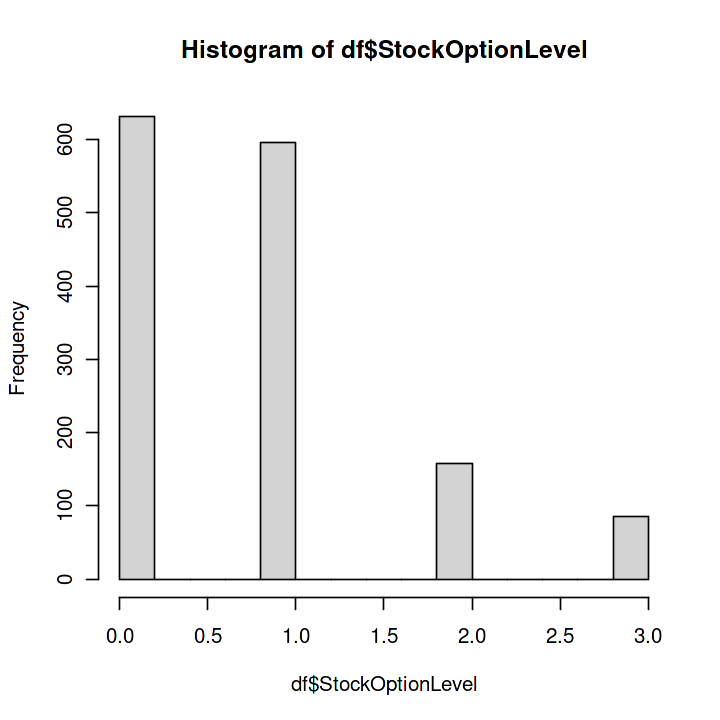

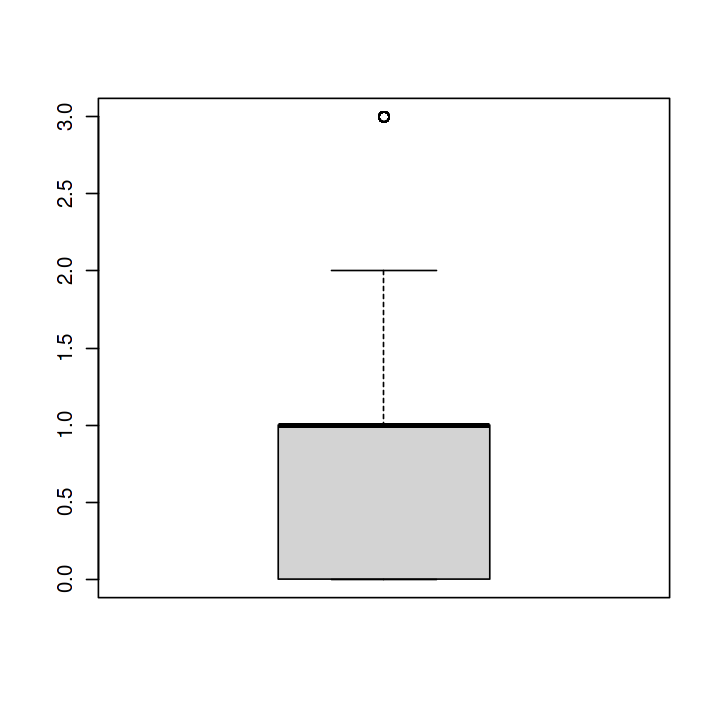

In [44]:
hist(df$StockOptionLevel)
boxplot(df$StockOptionLevel)

In [45]:
df %>% 
  select(StockOptionLevel) %>%
  group_by(StockOptionLevel) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

StockOptionLevel,N,percent
<int>,<int>,<dbl>
0,631,0.43
1,596,0.41
2,158,0.11
3,85,0.06


- TotalWorkingYears

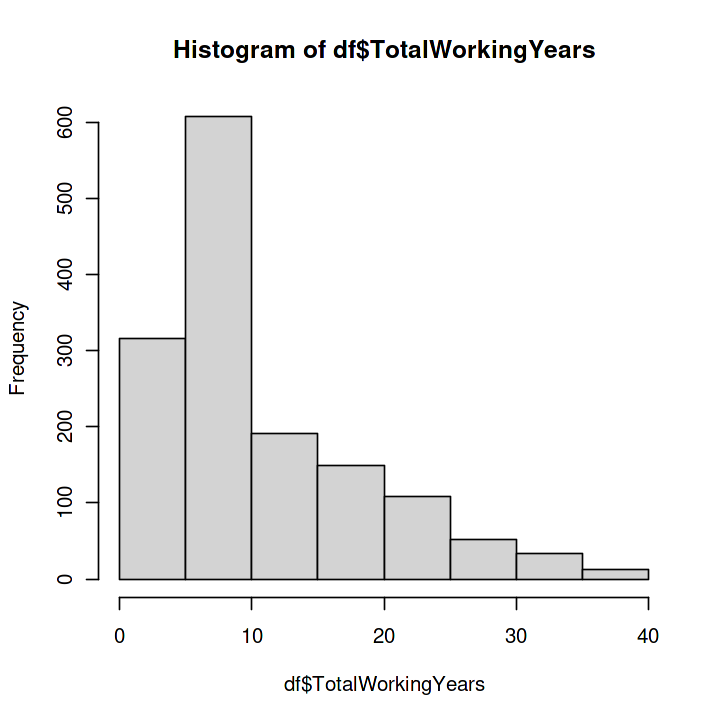

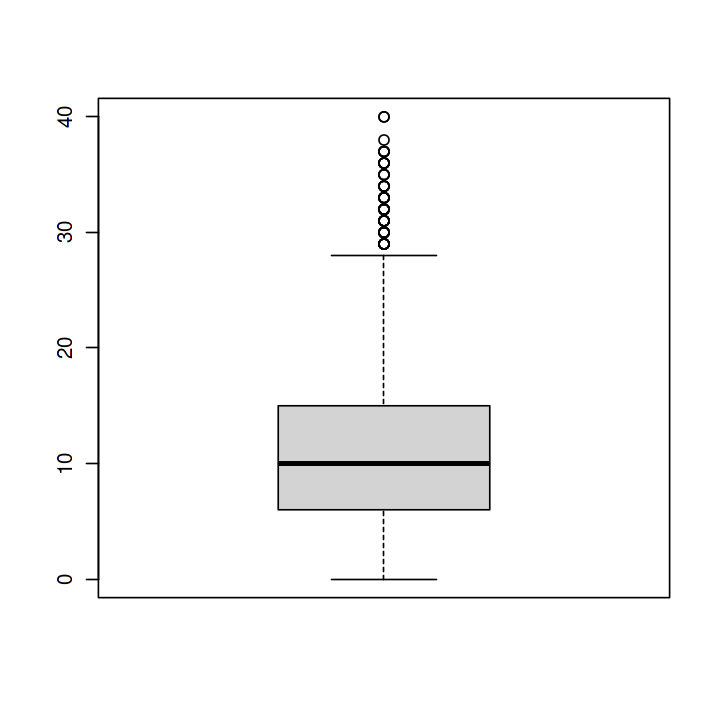

In [46]:
hist(df$TotalWorkingYears)
boxplot(df$TotalWorkingYears)

- TrainingTimesLastYear

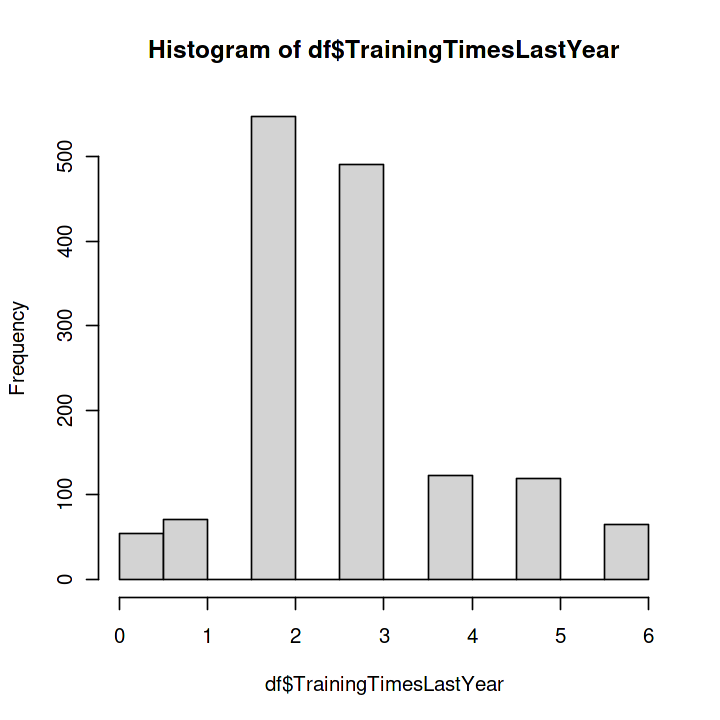

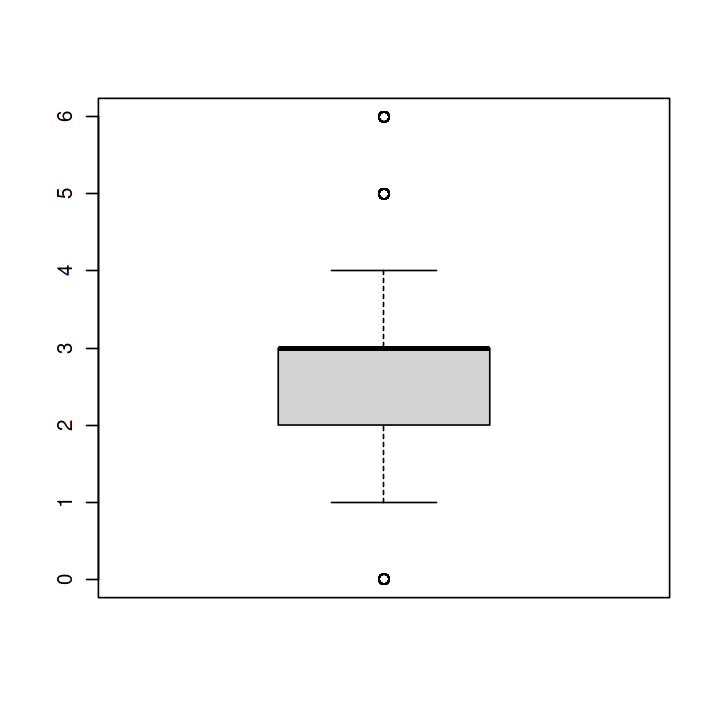

In [47]:
hist(df$TrainingTimesLastYear)
boxplot(df$TrainingTimesLastYear)

In [48]:
df %>% 
  select(TrainingTimesLastYear) %>%
  group_by(TrainingTimesLastYear) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

TrainingTimesLastYear,N,percent
<int>,<int>,<dbl>
0,54,0.04
1,71,0.05
2,547,0.37
3,491,0.33
4,123,0.08
5,119,0.08
6,65,0.04


- WorkLifeBalance

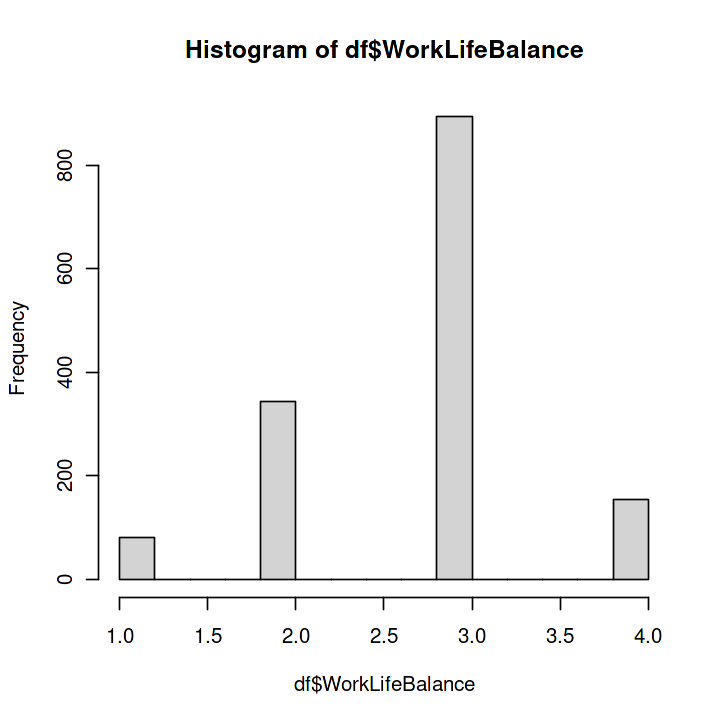

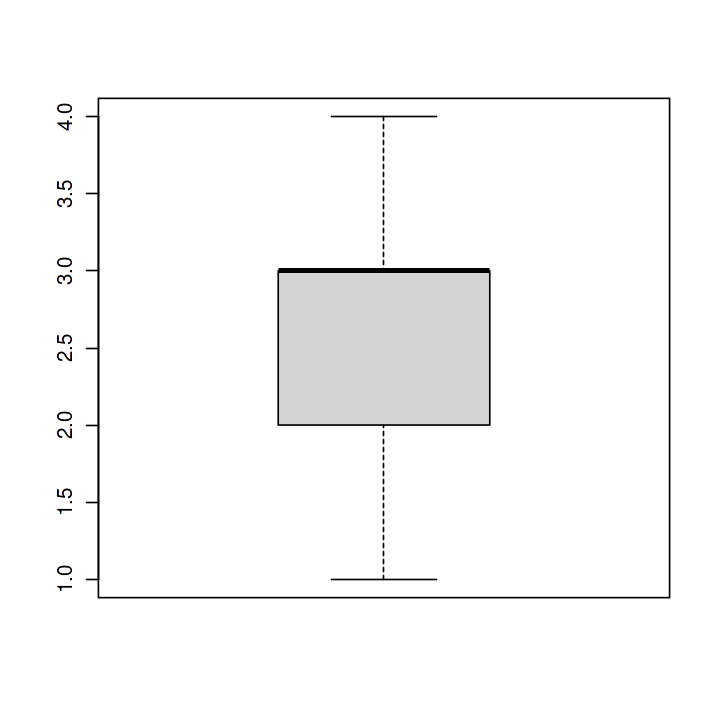

In [49]:
hist(df$WorkLifeBalance)
boxplot(df$WorkLifeBalance)

In [50]:
df %>% 
  select(WorkLifeBalance) %>%
  group_by(WorkLifeBalance) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))

WorkLifeBalance,N,percent
<int>,<int>,<dbl>
1,80,0.05
2,344,0.23
3,893,0.61
4,153,0.10


RelationshipSatisfaction is a numerical value that indicates (indeed the feature is categorical):

- 1 'Bad'
- 2 'Good'
- 3 'Better'
- 4 'Best'

- YearsAtCompany

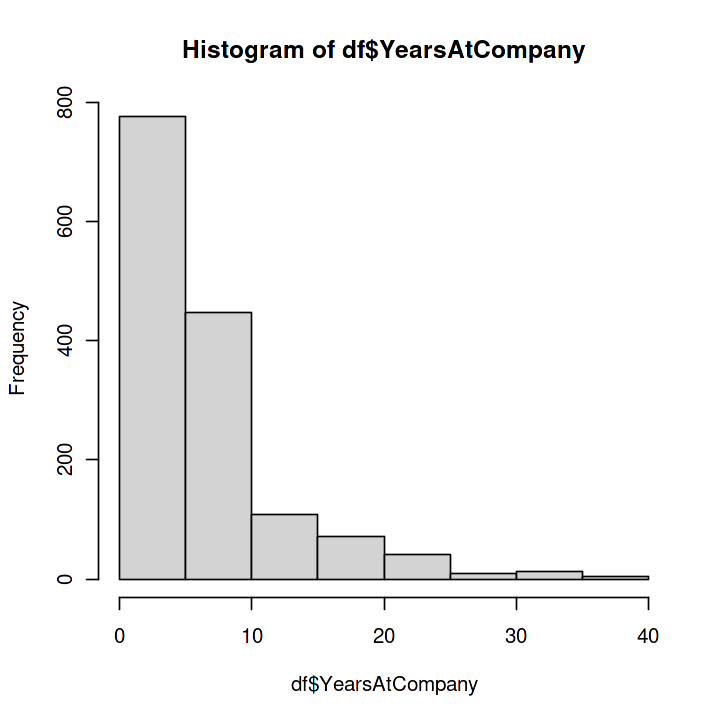

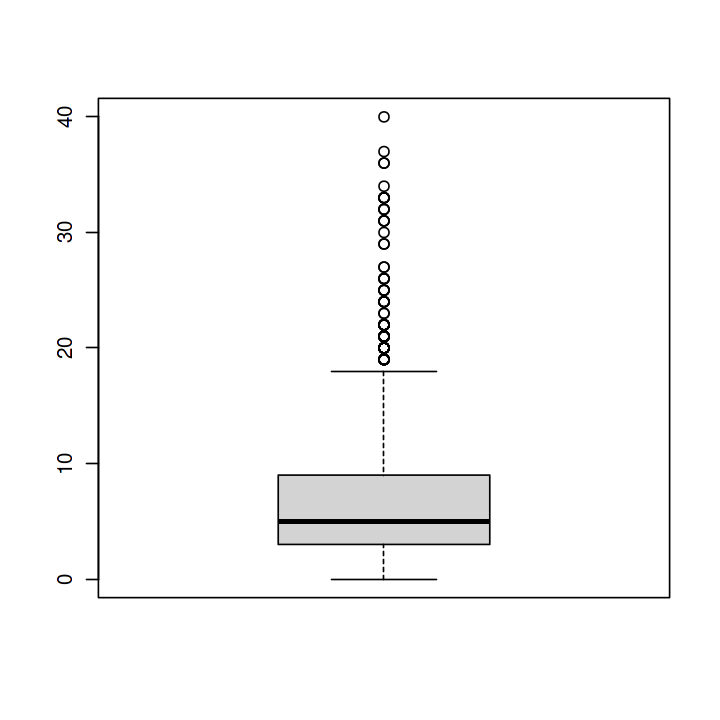

In [51]:
hist(df$YearsAtCompany)
boxplot(df$YearsAtCompany)

- YearsInCurrentRole

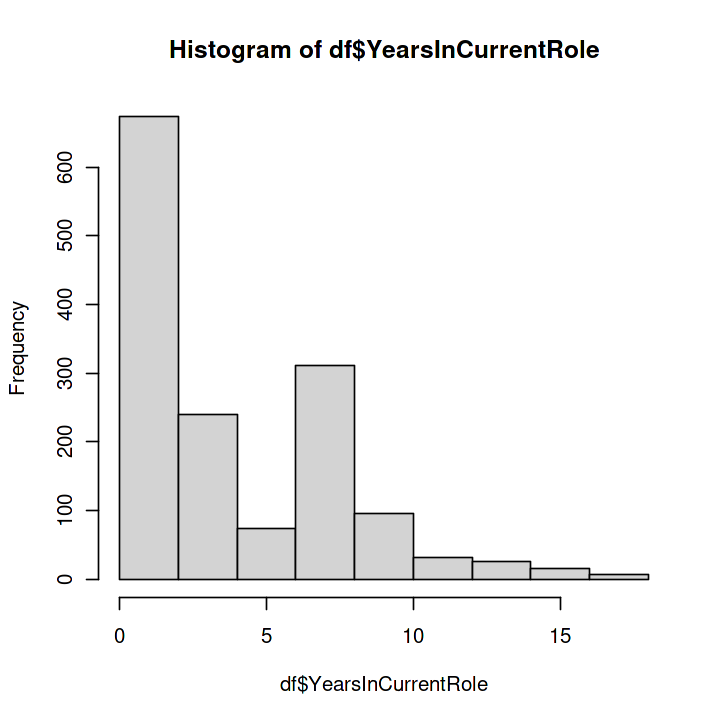

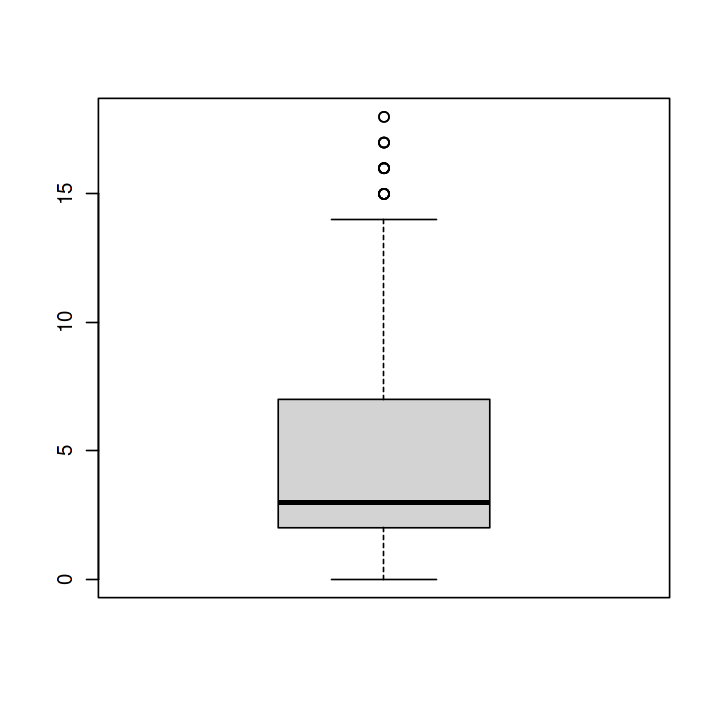

In [52]:
hist(df$YearsInCurrentRole)
boxplot(df$YearsInCurrentRole)

- YearsSinceLastPromotion

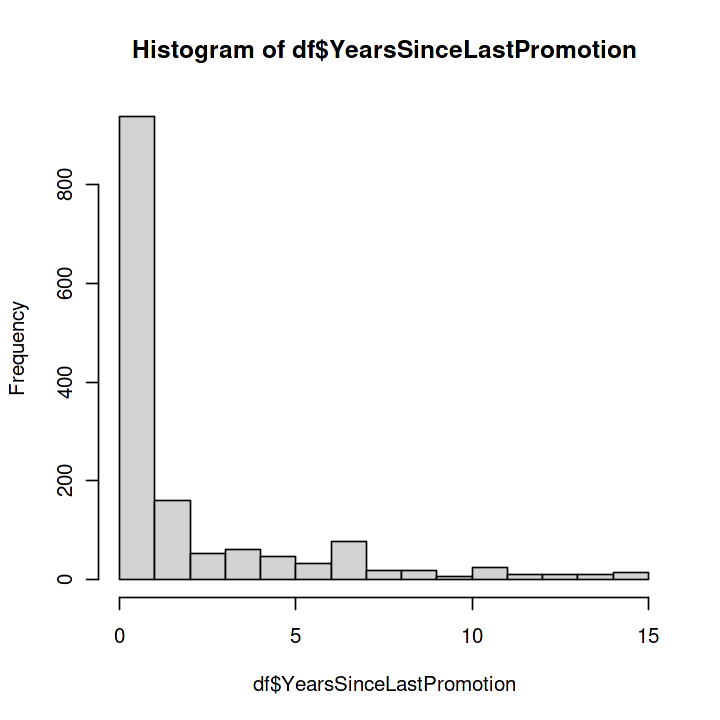

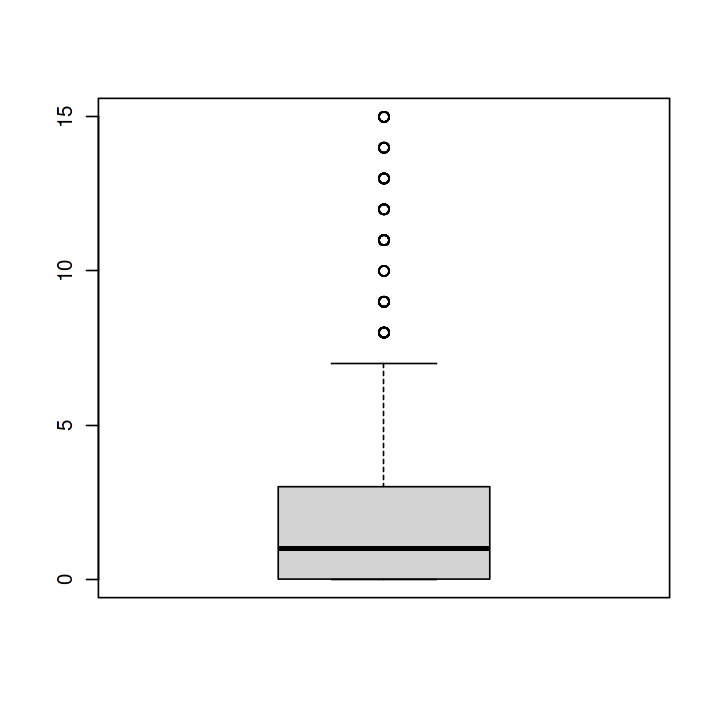

In [53]:
hist(df$YearsSinceLastPromotion)
boxplot(df$YearsSinceLastPromotion)

- YearsWithCurrManager

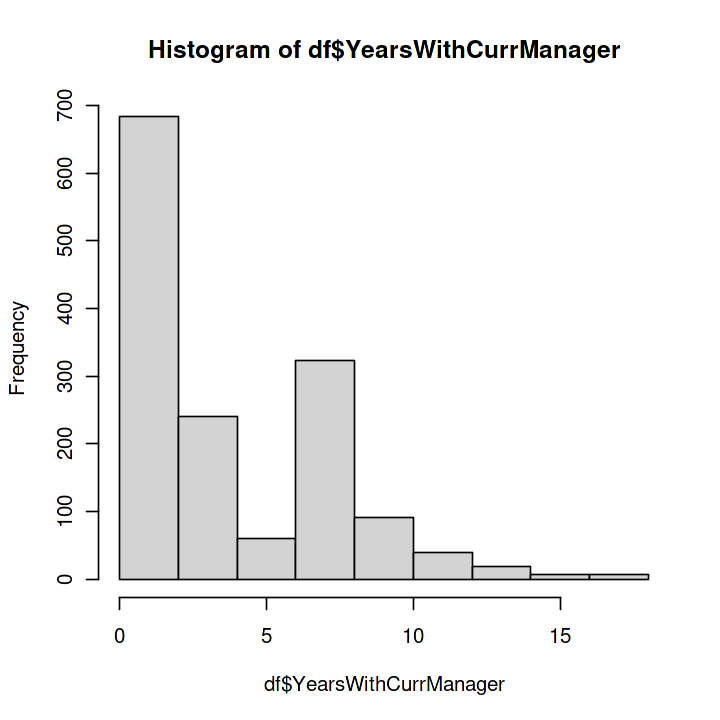

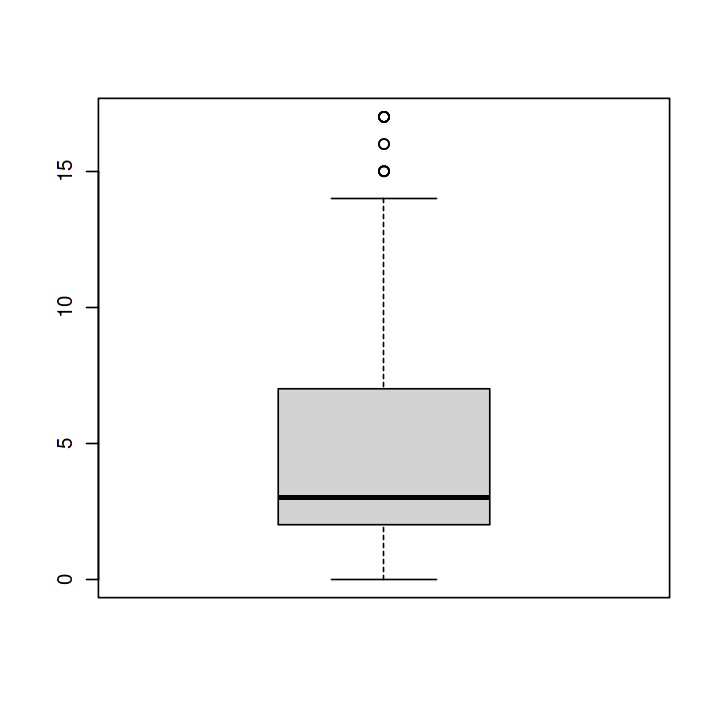

In [54]:
hist(df$YearsWithCurrManager)
boxplot(df$YearsWithCurrManager)

##### Numerical values correlation

We can also see correlations between all the numerical features.

In [55]:
numerical = c(1,4,6,7,11,13,14,15,17,19,20,21,24,25,26,28,29,30,31,32,33,34,35)
res <- round(cor(df[,numerical]),2)

corrplot 0.88 loaded



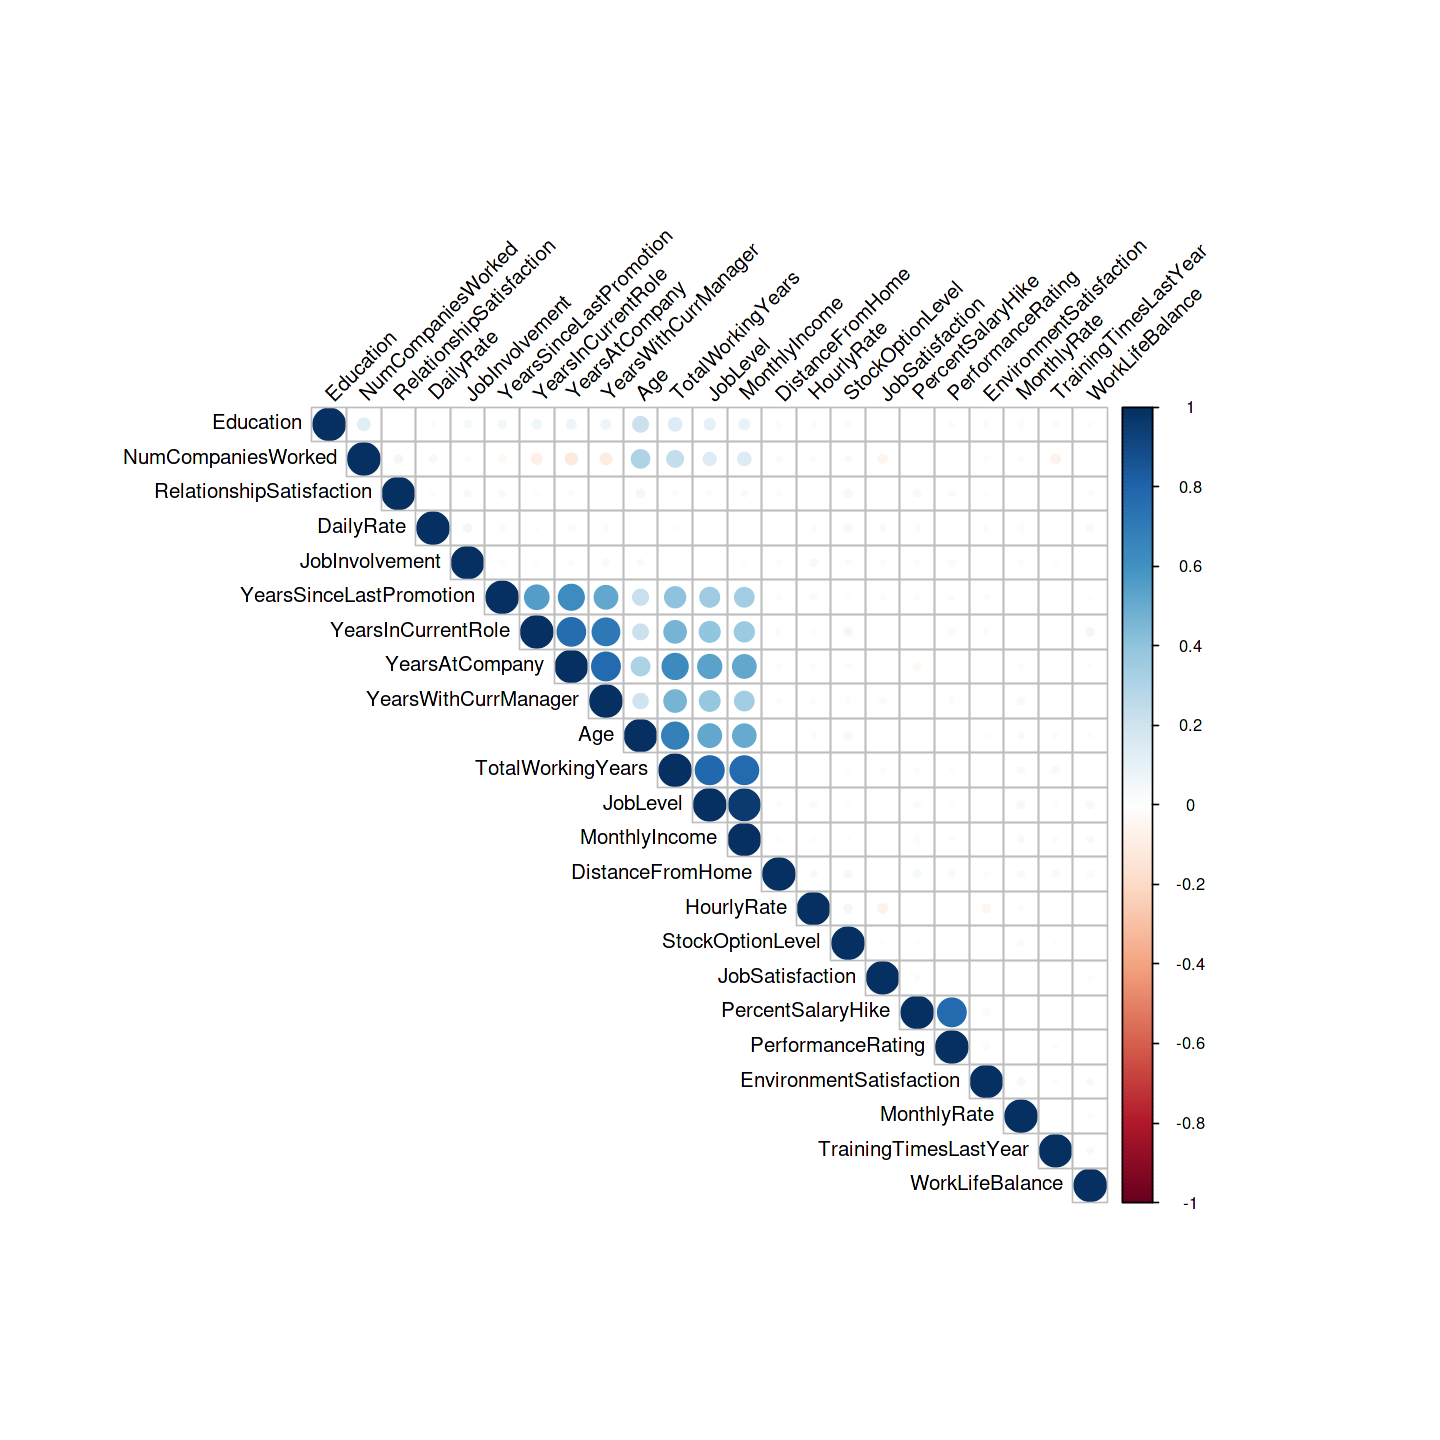

In [56]:
library(corrplot)
options(repr.plot.width=12, repr.plot.height=12)

corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)
options(repr.plot.width=6, repr.plot.height=6)


## Models implementation

### Train and validation split

In [57]:
set.seed(123)

df$Attrition<- as.numeric(df$Attrition == "Yes")
df$Attrition <- factor(df$Attrition)

# We are only using some features on the training set, those which may give value to our predictions
selected.var <- c(29,19,16,23,1,4,15,6,32,13,2)
selected.df <- df[, selected.var]
str(selected.df)

train.index <- sample(1:nrow(df), nrow(df)*0.7)  
train.df <- selected.df[train.index, ]
valid.df <- selected.df[-train.index, ]

'data.frame':	1470 obs. of  11 variables:
 $ TotalWorkingYears: int  8 10 7 8 6 8 12 1 10 17 ...
 $ MonthlyIncome    : int  5993 5130 2090 2909 3468 3068 2670 2693 9526 5237 ...
 $ JobRole          : Factor w/ 9 levels "Healthcare Representative",..: 8 7 3 7 3 3 3 3 5 1 ...
 $ OverTime         : Factor w/ 2 levels "No","Yes": 2 1 2 2 1 1 2 1 1 1 ...
 $ Age              : int  41 49 37 33 27 32 59 30 38 36 ...
 $ DailyRate        : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ JobLevel         : int  2 2 1 1 1 1 1 1 3 2 ...
 $ DistanceFromHome : int  1 8 2 3 2 2 3 24 23 27 ...
 $ YearsAtCompany   : int  6 10 0 8 2 7 1 1 9 7 ...
 $ HourlyRate       : int  94 61 92 56 40 79 81 67 44 94 ...
 $ Attrition        : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 1 1 1 1 ...


### Logistic regression¶


In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

![](https://upload.wikimedia.org/wikipedia/commons/6/6d/Exam_pass_logistic_curve.jpeg)


https://en.wikipedia.org/wiki/Logistic_regression

First we fit the model, by using family='binomial', we are setting the glm() regression to a logistic regressor.

In [58]:
model.reg <- glm(Attrition~., data = train.df, family = 'binomial')
summary(model.reg)


Call:
glm(formula = Attrition ~ ., family = "binomial", data = train.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7271  -0.5701  -0.3982  -0.2076   3.1852  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -1.066e+00  8.443e-01  -1.262 0.206907    
TotalWorkingYears              8.935e-03  3.018e-02   0.296 0.767227    
MonthlyIncome                  2.119e-05  8.488e-05   0.250 0.802850    
JobRoleHuman Resources         1.499e+00  6.155e-01   2.435 0.014896 *  
JobRoleLaboratory Technician   1.220e+00  5.094e-01   2.396 0.016576 *  
JobRoleManager                -5.010e-01  8.901e-01  -0.563 0.573565    
JobRoleManufacturing Director  5.119e-03  5.446e-01   0.009 0.992501    
JobRoleResearch Director      -1.578e+00  1.190e+00  -1.326 0.184957    
JobRoleResearch Scientist      5.345e-01  5.194e-01   1.029 0.303433    
JobRoleSales Executive         6.872e-01  4.561e-01   1.507 0.13191

Now we call the predict function. This function returns values depending on the probabilty of the sample being class 0 or class 1.

In [59]:
# Predict
model.reg.pred <- predict(model.reg, valid.df,  type = "response")

# For now we put a default threshold, we can begin with 0.5
pred <- ifelse(model.reg.pred > 0.5, 1, 0)

library(caret)
confusionMatrix(factor(pred), factor(valid.df$Attrition), positive = "1")

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 360  67
         1   6   8
                                          
               Accuracy : 0.8345          
                 95% CI : (0.7964, 0.8679)
    No Information Rate : 0.8299          
    P-Value [Acc > NIR] : 0.4299          
                                          
                  Kappa : 0.1334          
                                          
 Mcnemar's Test P-Value : 2.18e-12        
                                          
            Sensitivity : 0.10667         
            Specificity : 0.98361         
         Pos Pred Value : 0.57143         
         Neg Pred Value : 0.84309         
             Prevalence : 0.17007         
         Detection Rate : 0.01814         
   Detection Prevalence : 0.03175         
      Balanced Accuracy : 0.54514         
                                          
       'Positive' Class : 1               
                              

**About the prediction metrics:** We see that we are given a lot of different metrics. In this particular case, we should not really focus on the accuracy metric, as it tells us the percentatge of samples that were correctly classified. However, with this dataset obtaining a high accuracy is really simple, as the percentatge of negative samples is about an 84%, if we had a model that always predicts the 0 class, we will get about 84% accuraccy. 

That is why we should focus more in the sensitivity (the ability of recognising positive samples), and the main objective will be obtaining a model with a good sensitivity and good specificity, even if the accuraccy is lower.

For that we will explore the ROC curve, and choose the threshold which is closer to the "perfect" model, with 100% sensitivity and 100% pecificity.

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



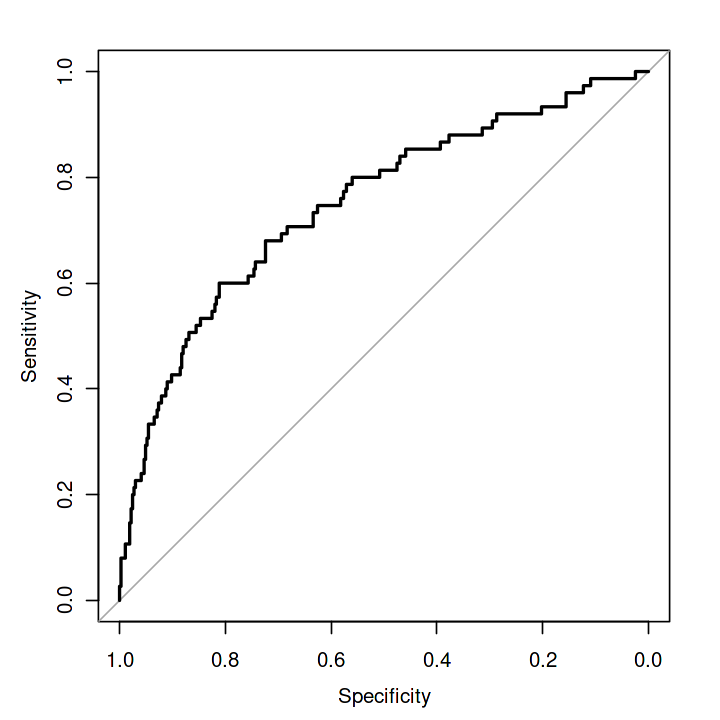

In [60]:
library(pROC)
r <- roc(valid.df$Attrition, model.reg.pred)
plot.roc(r)

In [61]:
best_point <- coords(r, x = "best")
best_point

threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
0.2235339,0.8114754,0.6


Now we set the best point threshold and see the model performance with the validation data set. Even if we now have lower accuraccy, the trade-off between sensitivity and specifity is way better.

In [62]:
pred <- ifelse(model.reg.pred > best_point$threshold, 1, 0)
library(caret)
confusionMatrix(factor(pred), factor(valid.df$Attrition), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 297  30
         1  69  45
                                          
               Accuracy : 0.7755          
                 95% CI : (0.7337, 0.8136)
    No Information Rate : 0.8299          
    P-Value [Acc > NIR] : 0.9986548       
                                          
                  Kappa : 0.341           
                                          
 Mcnemar's Test P-Value : 0.0001339       
                                          
            Sensitivity : 0.6000          
            Specificity : 0.8115          
         Pos Pred Value : 0.3947          
         Neg Pred Value : 0.9083          
             Prevalence : 0.1701          
         Detection Rate : 0.1020          
   Detection Prevalence : 0.2585          
      Balanced Accuracy : 0.7057          
                                          
       'Positive' Class : 1               
                              

### Linear discriminant¶


Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics and other fields, to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

https://en.wikipedia.org/wiki/Linear_discriminant_analysis

First we train the LDA model.

In [63]:
library(MASS)
# Fit the model
model.lda <- lda(Attrition~., data=train.df)



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Now we can see the coefficients values for each feature.

In [64]:
model.lda

Call:
lda(Attrition ~ ., data = train.df)

Prior probabilities of groups:
        0         1 
0.8425656 0.1574344 

Group means:
  TotalWorkingYears MonthlyIncome JobRoleHuman Resources
0          12.35294      7057.046             0.02652826
1           8.12963      4580.673             0.05555556
  JobRoleLaboratory Technician JobRoleManager JobRoleManufacturing Director
0                    0.1580161     0.08881200                    0.11303345
1                    0.2654321     0.01851852                    0.05555556
  JobRoleResearch Director JobRoleResearch Scientist JobRoleSales Executive
0               0.06805075                 0.1972318              0.2110727
1               0.00617284                 0.1975309              0.2037037
  JobRoleSales Representative OverTimeYes      Age DailyRate JobLevel
0                  0.04036909   0.2318339 37.84544  809.7982 2.198385
1                  0.15432099   0.5123457 32.62963  755.7222 1.611111
  DistanceFromHome YearsAtCompany

In [65]:
# Predict the classes
model.lda.pred <- predict(model.lda, valid.df)


We can see the probabilites of being of each class assigned by the model.

In [66]:
head(model.lda.pred$posterior)

,0,1
3,0.6498055,0.35019449
7,0.8363101,0.16368987
14,0.8575615,0.14243851
15,0.3206485,0.67935146
21,0.9229949,0.07700514
22,0.6620978,0.33790224


In [67]:
library(caret)
confusionMatrix(factor(model.lda.pred$class), factor(valid.df$Attrition), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 354  64
         1  12  11
                                          
               Accuracy : 0.8277          
                 95% CI : (0.7891, 0.8617)
    No Information Rate : 0.8299          
    P-Value [Acc > NIR] : 0.5806          
                                          
                  Kappa : 0.1572          
                                          
 Mcnemar's Test P-Value : 4.913e-09       
                                          
            Sensitivity : 0.14667         
            Specificity : 0.96721         
         Pos Pred Value : 0.47826         
         Neg Pred Value : 0.84689         
             Prevalence : 0.17007         
         Detection Rate : 0.02494         
   Detection Prevalence : 0.05215         
      Balanced Accuracy : 0.55694         
                                          
       'Positive' Class : 1               
                              

We see that the model sensitivity is lower. In this case we do not really focus on that as this model performance, as this model is mainly used to analyse the data.

### Quadratic discriminant¶


In statistics, a quadratic classifier is a statistical classifier that uses a quadratic decision surface to separate measurements of two or more classes of objects or events. It is a more general version of the linear classifier.

https://en.wikipedia.org/wiki/Quadratic_classifier

Fit the model.

In [68]:
model.qda <- qda(Attrition~., data=train.df)


In [69]:
model.qda

Call:
qda(Attrition ~ ., data = train.df)

Prior probabilities of groups:
        0         1 
0.8425656 0.1574344 

Group means:
  TotalWorkingYears MonthlyIncome JobRoleHuman Resources
0          12.35294      7057.046             0.02652826
1           8.12963      4580.673             0.05555556
  JobRoleLaboratory Technician JobRoleManager JobRoleManufacturing Director
0                    0.1580161     0.08881200                    0.11303345
1                    0.2654321     0.01851852                    0.05555556
  JobRoleResearch Director JobRoleResearch Scientist JobRoleSales Executive
0               0.06805075                 0.1972318              0.2110727
1               0.00617284                 0.1975309              0.2037037
  JobRoleSales Representative OverTimeYes      Age DailyRate JobLevel
0                  0.04036909   0.2318339 37.84544  809.7982 2.198385
1                  0.15432099   0.5123457 32.62963  755.7222 1.611111
  DistanceFromHome YearsAtCompany

Then we predict the classes. We can see the probabilities of each sample associated to each class.

In [70]:
model.qda.pred <- predict(model.qda, valid.df)
head(model.qda.pred$posterior)

,0,1
3,0.0214166244,0.97858338
7,0.1498494104,0.85015059
14,0.4941586809,0.50584132
15,0.0124021357,0.98759786
21,0.9699735594,0.03002644
22,0.0003317975,0.99966820


In [71]:
library(caret)
confusionMatrix(factor(model.qda.pred$class), factor(valid.df$Attrition), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 249  28
         1 117  47
                                          
               Accuracy : 0.6712          
                 95% CI : (0.6252, 0.7149)
    No Information Rate : 0.8299          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2086          
                                          
 Mcnemar's Test P-Value : 2.711e-13       
                                          
            Sensitivity : 0.6267          
            Specificity : 0.6803          
         Pos Pred Value : 0.2866          
         Neg Pred Value : 0.8989          
             Prevalence : 0.1701          
         Detection Rate : 0.1066          
   Detection Prevalence : 0.3719          
      Balanced Accuracy : 0.6535          
                                          
       'Positive' Class : 1               
                              

We see that this model has higher sensitivity that the LDA, even with lower accuracy, it performs better as it is able to get closer to the 100% Specificity and Sensitivity ideal model.

### Support Vector Machine¶


A support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection.


https://en.wikipedia.org/wiki/Support-vector_machine

First we train the model using a linear kernel. The cost parameter is very important when defining a SVM, as this determines the regularization cost function value.

In [72]:
library(e1071)
model.svm <- svm(Attrition~., data=train.df, type="C-classification", kernel="linear", cost = 1)


In [73]:
summary(model.svm)


Call:
svm(formula = Attrition ~ ., data = train.df, type = "C-classification", 
    kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  406

 ( 162 244 )


Number of Classes:  2 

Levels: 
 0 1




In [74]:
model.svm.pred <- predict(model.svm, valid.df)

confusionMatrix(model.svm.pred, valid.df$Attrition, positive="1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 366  75
         1   0   0
                                          
               Accuracy : 0.8299          
                 95% CI : (0.7915, 0.8638)
    No Information Rate : 0.8299          
    P-Value [Acc > NIR] : 0.5308          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.8299          
             Prevalence : 0.1701          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 1               
                              

The model with linear kernel and cost=1 is not able to predict any negative sample, so we may need to tune this parameters to get a better model.

In [75]:
svm.tune <- tune(svm, Attrition~., data = train.df,
            ranges = list(cost = 2^(-10:6), kernel = c("radial","linear","sigmoid","polynomial")))

In [76]:
summary(svm.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost kernel
   16 radial

- best performance: 0.144803 

- Detailed performance results:
           cost     kernel     error dispersion
1  9.765625e-04     radial 0.1574434 0.01938824
2  1.953125e-03     radial 0.1574434 0.01938824
3  3.906250e-03     radial 0.1574434 0.01938824
4  7.812500e-03     radial 0.1574434 0.01938824
5  1.562500e-02     radial 0.1574434 0.01938824
6  3.125000e-02     radial 0.1574434 0.01938824
7  6.250000e-02     radial 0.1574434 0.01938824
8  1.250000e-01     radial 0.1574434 0.01938824
9  2.500000e-01     radial 0.1574434 0.01938824
10 5.000000e-01     radial 0.1574434 0.01938824
11 1.000000e+00     radial 0.1564725 0.02127693
12 2.000000e+00     radial 0.1525795 0.02151952
13 4.000000e+00     radial 0.1486960 0.02972096
14 8.000000e+00     radial 0.1477251 0.02781536
15 1.600000e+01     radial 0.1448030 0.02484730
16 3.200000e+01     radial 0.1593756 0.03367821


In [77]:
model.svm <- svm(Attrition~., data=train.df, type="C-classification", kernel=svm.tune$best.parameters$kernel, cost = svm.tune$best.parameters$cost)

In [78]:
model.svm.pred <- predict(model.svm, valid.df)

confusionMatrix(model.svm.pred, valid.df$Attrition, positive="1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 357  63
         1   9  12
                                        
               Accuracy : 0.8367        
                 95% CI : (0.7989, 0.87)
    No Information Rate : 0.8299        
    P-Value [Acc > NIR] : 0.3805        
                                        
                  Kappa : 0.1897        
                                        
 Mcnemar's Test P-Value : 4.208e-10     
                                        
            Sensitivity : 0.16000       
            Specificity : 0.97541       
         Pos Pred Value : 0.57143       
         Neg Pred Value : 0.85000       
             Prevalence : 0.17007       
         Detection Rate : 0.02721       
   Detection Prevalence : 0.04762       
      Balanced Accuracy : 0.56770       
                                        
       'Positive' Class : 1             
                                        

With this parameter tuning we are maximazing the model accuracy, maybe we should search for other model with higher sensitivity.

In [79]:
model.svm <- svm(Attrition~., data=train.df, type="C-classification", kernel="radial", cost = 20)
model.svm.pred <- predict(model.svm, valid.df)
confusionMatrix(model.svm.pred, valid.df$Attrition, positive="1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 357  58
         1   9  17
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8111, 0.8803)
    No Information Rate : 0.8299          
    P-Value [Acc > NIR] : 0.1712          
                                          
                  Kappa : 0.273           
                                          
 Mcnemar's Test P-Value : 4.515e-09       
                                          
            Sensitivity : 0.22667         
            Specificity : 0.97541         
         Pos Pred Value : 0.65385         
         Neg Pred Value : 0.86024         
             Prevalence : 0.17007         
         Detection Rate : 0.03855         
   Detection Prevalence : 0.05896         
      Balanced Accuracy : 0.60104         
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 1, case = 2

Setting direction: controls < cases



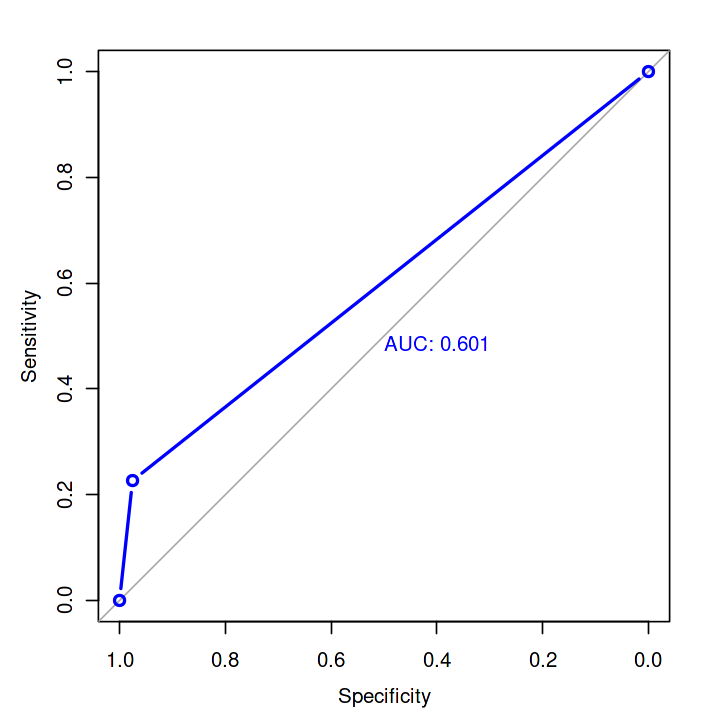

In [80]:
model.svm.plot <- plot.roc(as.numeric(valid.df$Attrition), as.numeric(model.svm.pred), lwd=2, type="b", print.auc=TRUE, col ="blue")

A large cost gives you low bias and high variance. Low bias because you penalize the cost of misclassification a lot. Large cost makes the cost of misclassification high, thus forcing the algorithm to explain the input data stricter and potentially overfit.

A small cost gives you higher bias and lower variance. Small cost makes the cost of misclassification low, thus allowing more of them for the sake of wider "cushion"

### Decision Tree¶


Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

https://scikit-learn.org/stable/modules/tree.html#:~:text=Decision%20Trees%20(DTs)%20are%20a,as%20a%20piecewise%20constant%20approximation.

First we load the libraries and fit the data.

In [81]:
library(ISLR)
require(tree)

model.tree <- tree(Attrition~., data=valid.df)

Loading required package: tree

Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 



In [82]:
summary(model.tree)


Classification tree:
tree(formula = Attrition ~ ., data = valid.df)
Variables actually used in tree construction:
[1] "OverTime"          "JobRole"           "YearsAtCompany"   
[4] "HourlyRate"        "Age"               "DailyRate"        
[7] "TotalWorkingYears" "DistanceFromHome"  "MonthlyIncome"    
Number of terminal nodes:  27 
Residual mean deviance:  0.4388 = 181.7 / 414 
Misclassification error rate: 0.09977 = 44 / 441 

In [83]:
model.tree.pred <- predict(model.tree, valid.df, type="class")
confusionMatrix(model.tree.pred, valid.df$Attrition, positive="1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 351  24
         1  15  51
                                          
               Accuracy : 0.9116          
                 95% CI : (0.8811, 0.9364)
    No Information Rate : 0.8299          
    P-Value [Acc > NIR] : 6.161e-07       
                                          
                  Kappa : 0.671           
                                          
 Mcnemar's Test P-Value : 0.2002          
                                          
            Sensitivity : 0.6800          
            Specificity : 0.9590          
         Pos Pred Value : 0.7727          
         Neg Pred Value : 0.9360          
             Prevalence : 0.1701          
         Detection Rate : 0.1156          
   Detection Prevalence : 0.1497          
      Balanced Accuracy : 0.8195          
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 1, case = 2

Setting direction: controls < cases



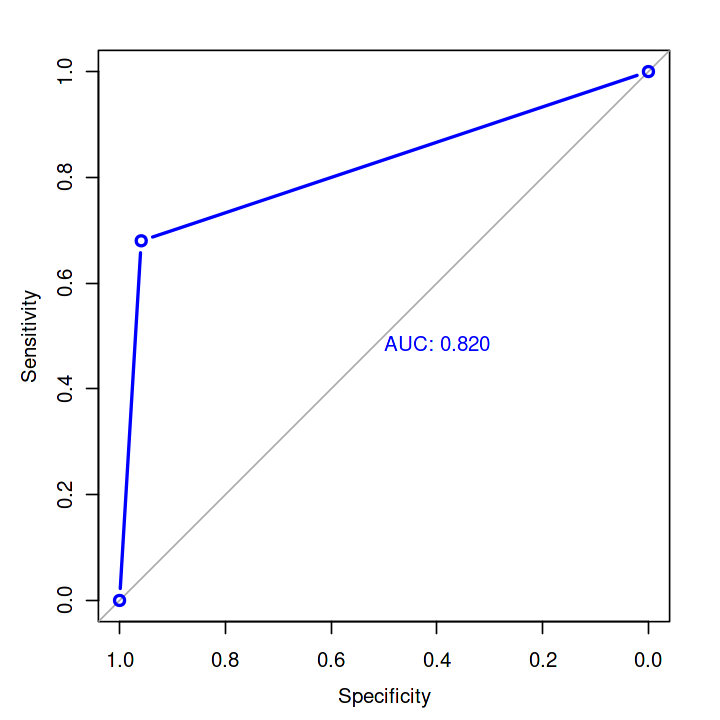

In [84]:
model.tree.plot <- plot.roc(as.numeric(valid.df$Attrition), as.numeric(model.tree.pred), lwd=2, type="b", print.auc=TRUE, col ="blue")

We see that the decision tree model has really high accuracy(compared with the previous models), and also has balanced sensitivity and specificity, and it is able to correctly classify most of the positive samples.

### Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

https://en.wikipedia.org/wiki/Random_forest

Fit the model

In [85]:
library(randomForest)
model.randForest <- randomForest(Attrition~., train.df, importance=TRUE, ntree=500)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [86]:
model.randForest


Call:
 randomForest(formula = Attrition ~ ., data = train.df, importance = TRUE,      ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 14.58%
Confusion matrix:
    0  1 class.error
0 840 27  0.03114187
1 123 39  0.75925926

In [87]:
model.randForest.pred <- predict(model.randForest, valid.df)
confusionMatrix(model.randForest.pred, valid.df$Attrition, positive="1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 355  59
         1  11  16
                                          
               Accuracy : 0.8413          
                 95% CI : (0.8038, 0.8741)
    No Information Rate : 0.8299          
    P-Value [Acc > NIR] : 0.2875          
                                          
                  Kappa : 0.2458          
                                          
 Mcnemar's Test P-Value : 1.937e-08       
                                          
            Sensitivity : 0.21333         
            Specificity : 0.96995         
         Pos Pred Value : 0.59259         
         Neg Pred Value : 0.85749         
             Prevalence : 0.17007         
         Detection Rate : 0.03628         
   Detection Prevalence : 0.06122         
      Balanced Accuracy : 0.59164         
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 1, case = 2

Setting direction: controls < cases



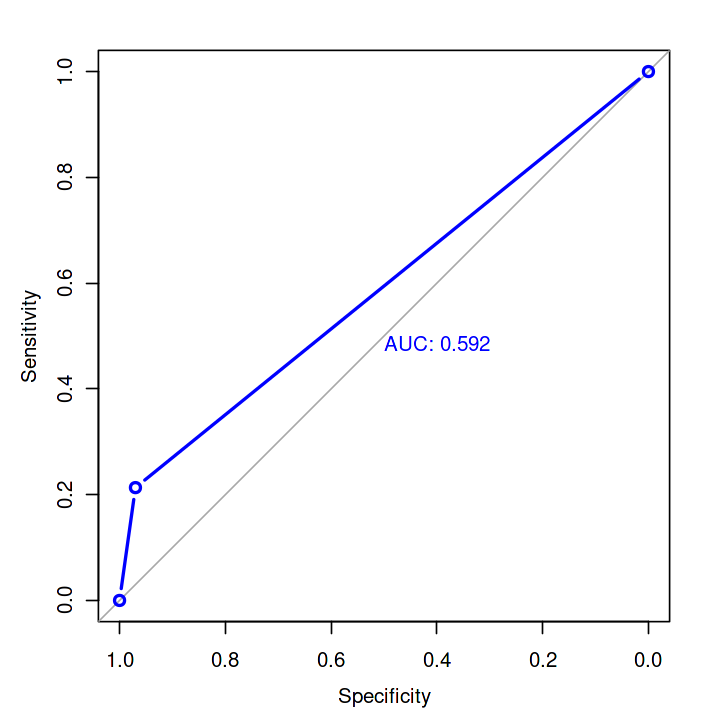

In [88]:
model.randForest.plot <- plot.roc(as.numeric(valid.df$Attrition), as.numeric(model.randForest.pred), lwd=2, type="b", print.auc=TRUE, col ="blue")

We see that the random forest also obtains high accuracy and sensitivity and specifity values.

### Bagging

When we create a single decision tree, we only use one training dataset to build the model.

However, bagging uses the following method:

1. Take b bootstrapped samples from the original dataset.

Recall that a bootstrapped sample is a sample of the original dataset in which the observations are taken with replacement.
2. Build a decision tree for each bootstrapped sample.

3. Average the predictions of each tree to come up with a final model.

For regression trees, we take the average of the prediction made by the B trees.
For classification trees, we take the most commonly occurring prediction made by the B trees.
Bagging can be used with any machine learning algorithm, but it’s particularly useful for decision trees because they inherently have high variance and bagging is able to dramatically reduce the variance, which leads to lower test error.

https://www.statology.org/bagging-machine-learning/#:~:text=Bagging%20can%20be%20used%20with%20any%20machine%20learning,grow%20B%20individual%20trees%20deeply%20without%20pruning%20them.

When we add a value to the mtry variable the algorithm randomly selects mtry variables from the set of predictors available. Hence when forming each split a different random set of variables is selected within which the best split point is chosen.

In [89]:
model.bag <- randomForest(Attrition~., train.df, importance=TRUE, ntree=500, mtry=10) 
model.bag


Call:
 randomForest(formula = Attrition ~ ., data = train.df, importance = TRUE,      ntree = 500, mtry = 10) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 10

        OOB estimate of  error rate: 14.87%
Confusion matrix:
    0  1 class.error
0 831 36  0.04152249
1 117 45  0.72222222

In [90]:
model.bag.pred <- predict(model.bag, valid.df)
confusionMatrix(model.bag.pred, valid.df$Attrition, positive="1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 351  54
         1  15  21
                                          
               Accuracy : 0.8435          
                 95% CI : (0.8062, 0.8762)
    No Information Rate : 0.8299          
    P-Value [Acc > NIR] : 0.2451          
                                          
                  Kappa : 0.3013          
                                          
 Mcnemar's Test P-Value : 4.77e-06        
                                          
            Sensitivity : 0.28000         
            Specificity : 0.95902         
         Pos Pred Value : 0.58333         
         Neg Pred Value : 0.86667         
             Prevalence : 0.17007         
         Detection Rate : 0.04762         
   Detection Prevalence : 0.08163         
      Balanced Accuracy : 0.61951         
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 1, case = 2

Setting direction: controls < cases



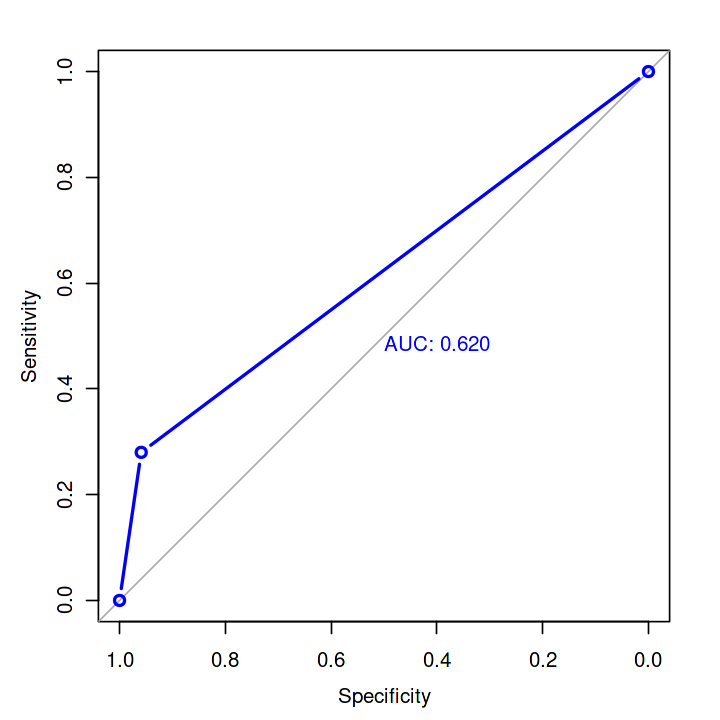

In [91]:
model.bag.plot <- plot.roc(as.numeric(valid.df$Attrition), as.numeric(model.bag.pred), lwd=2, type="b", print.auc=TRUE, col ="blue")

We see that the model performs better than the simple random forest regressor.

### Boosting

In machine learning, boosting is an ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones.


https://en.wikipedia.org/wiki/Boosting_(machine_learning)

In [92]:
train.df$Attrition <- as.logical(as.integer(train.df$Attrition)-1)

We can use the gbm library (generalized boosted regression models)

In [93]:
library(gbm)
model.boost <- gbm(Attrition~., data=train.df, distribution="bernoulli")
model.boost

Loaded gbm 2.1.8



gbm(formula = Attrition ~ ., distribution = "bernoulli", data = train.df)
A gradient boosted model with bernoulli loss function.
100 iterations were performed.
There were 10 predictors of which 10 had non-zero influence.

,var,rel.inf
,<chr>,<dbl>
MonthlyIncome,MonthlyIncome,23.044011
OverTime,OverTime,18.818203
Age,Age,18.406060
JobRole,JobRole,12.421881
DailyRate,DailyRate,6.369954
HourlyRate,HourlyRate,5.428987
YearsAtCompany,YearsAtCompany,5.128023
TotalWorkingYears,TotalWorkingYears,4.730047
DistanceFromHome,DistanceFromHome,3.686868


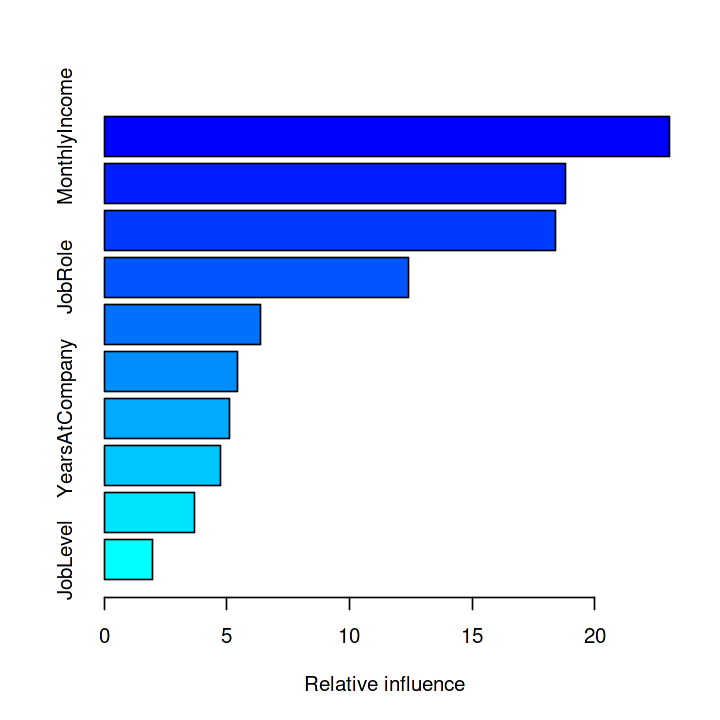

In [94]:
summary(model.boost)

In [95]:
model.boost.pred <- predict(model.boost, valid.df, n.trees = 100, type='response')
model.boost.pred <- ifelse(model.boost.pred>0.5,1,0)
confusionMatrix(model.bag.pred, valid.df$Attrition, positive="1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 351  54
         1  15  21
                                          
               Accuracy : 0.8435          
                 95% CI : (0.8062, 0.8762)
    No Information Rate : 0.8299          
    P-Value [Acc > NIR] : 0.2451          
                                          
                  Kappa : 0.3013          
                                          
 Mcnemar's Test P-Value : 4.77e-06        
                                          
            Sensitivity : 0.28000         
            Specificity : 0.95902         
         Pos Pred Value : 0.58333         
         Neg Pred Value : 0.86667         
             Prevalence : 0.17007         
         Detection Rate : 0.04762         
   Detection Prevalence : 0.08163         
      Balanced Accuracy : 0.61951         
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 1, case = 2

Setting direction: controls < cases



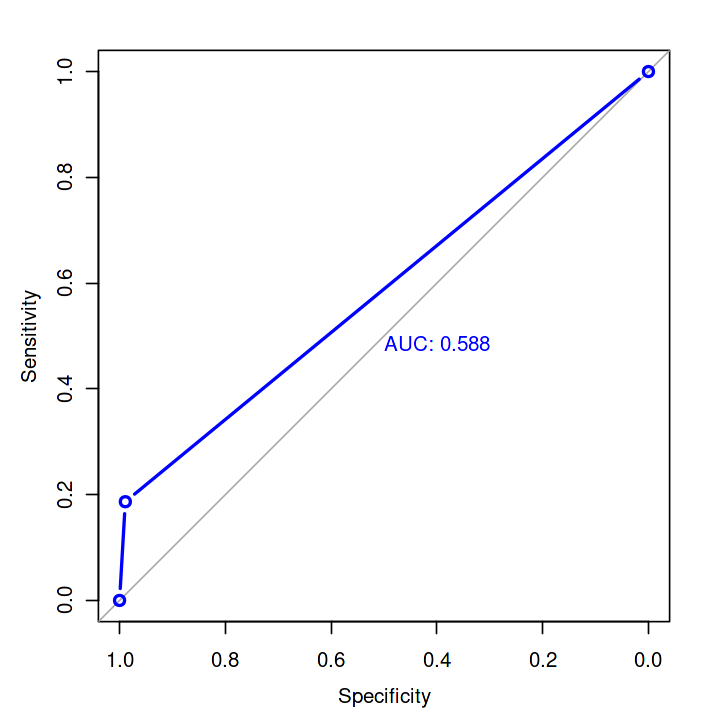

In [96]:
model.boost.plot <- plot.roc(as.numeric(valid.df$Attrition), as.numeric(model.boost.pred), lwd=2, type="b", print.auc=TRUE, col ="blue")

### Neuronal Networks

A neural network (NN), in the case of artificial neurons called artificial neural network (ANN) or simulated neural network (SNN), is an interconnected group of natural or artificial neurons that uses a mathematical or computational model for information processing based on a connectionistic approach to computation. In most cases an ANN is an adaptive system that changes its structure based on external or internal information that flows through the network.

In more practical terms neural networks are non-linear statistical data modeling or decision making tools. They can be used to model complex relationships between inputs and outputs or to find patterns in data.

https://en.wikipedia.org/wiki/Neural_network

We will use the keras library to generate and train our model.

In [97]:
require(keras)
x_train <- scale(model.matrix(Attrition ~ . - 1, data = train.df))
x_val <- scale(model.matrix(Attrition ~ . - 1, data = valid.df))

Loading required package: keras



We are not really focusing on the performance of the model, so we are not playing a lot with the layers size and shape, we only want to implement a model using NN to see its behaviour.

In [98]:
modelnn <- keras_model_sequential()
modelnn %>%
   layer_dense(units = 256, activation = "relu", input_shape = ncol(x_train)) %>%
   layer_dense(units = 128, activation = "relu") %>%
   layer_dense(units = 32, activation = "relu") %>%
   layer_dense(units = 1, activation = "sigmoid")

modelnn %>% compile(loss = "binary_crossentropy",
    optimizer = optimizer_rmsprop(),
    metrics = list("accuracy")
   )

history <- modelnn %>% fit(
     x_train, as.numeric(train.df$Attrition), epochs = 50, batch_size = 32,
    validation_data = list(x_val, as.numeric(valid.df$Attrition))
  )


When we train the model, we can see that if we use a huge number of epocs, the distance between train set and validation set performance becomes bigger. That is a typical behaviour when using NN, as the network starts overfitting the training set, and loses its capability to understand new data.

`geom_smooth()` using formula 'y ~ x'



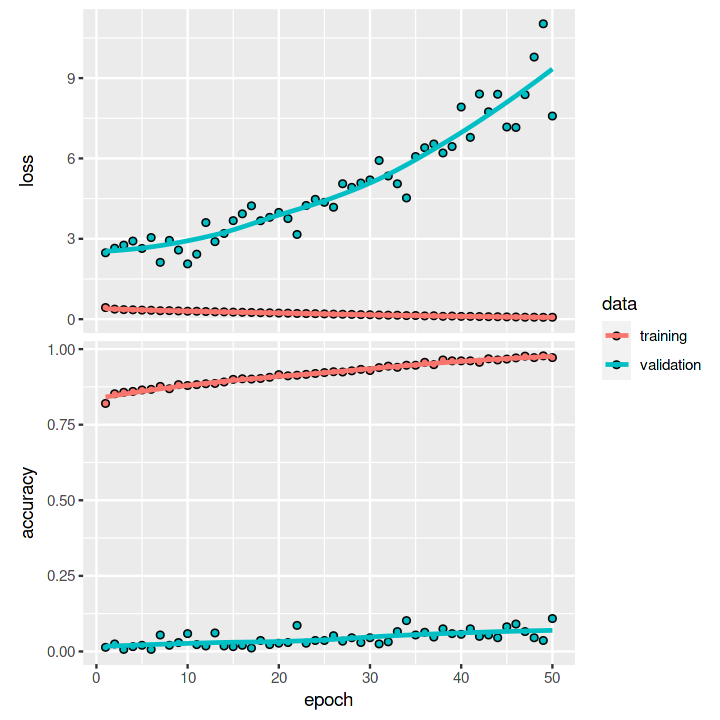

In [99]:
library(ggplot2)
plot(history)

In [100]:
modelnn.pred <- predict(modelnn, x_val)
modelnn.pred <- ifelse(modelnn.pred>0.5,1,0)
confusionMatrix(factor(modelnn.pred), factor(valid.df$Attrition), positive="1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 318  46
         1  48  29
                                          
               Accuracy : 0.7868          
                 95% CI : (0.7456, 0.8242)
    No Information Rate : 0.8299          
    P-Value [Acc > NIR] : 0.9920          
                                          
                  Kappa : 0.2528          
                                          
 Mcnemar's Test P-Value : 0.9179          
                                          
            Sensitivity : 0.38667         
            Specificity : 0.86885         
         Pos Pred Value : 0.37662         
         Neg Pred Value : 0.87363         
             Prevalence : 0.17007         
         Detection Rate : 0.06576         
   Detection Prevalence : 0.17460         
      Balanced Accuracy : 0.62776         
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 1, case = 2

Setting direction: controls < cases



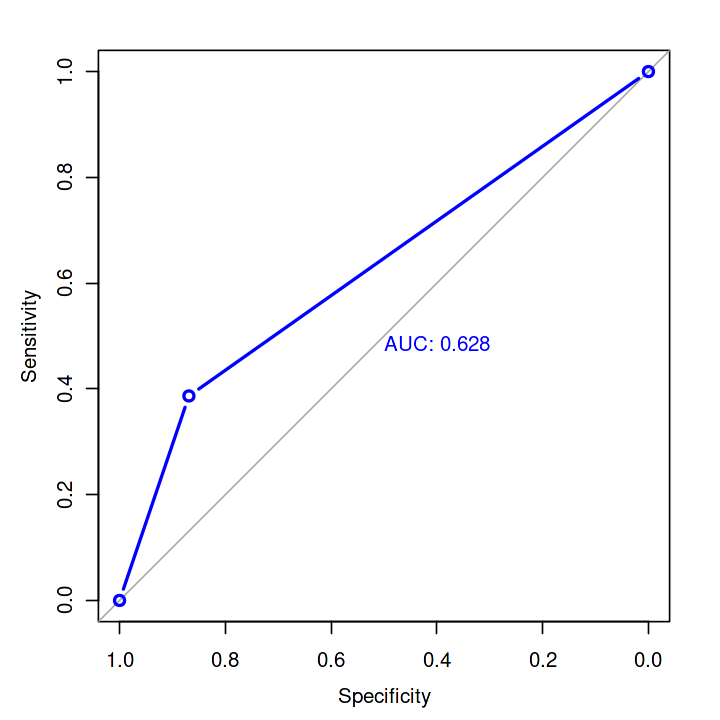

In [101]:
modelnn.plot <- plot.roc(as.numeric(valid.df$Attrition), as.numeric(modelnn.pred), lwd=2, type="b", print.auc=TRUE, col ="blue")

Indeed the model performs well, even we had expected it to perform better. Maybe we should play with the neuronal network parameters to see the true potential of the neuronal networks, or maybe they are not so good for this kind of binary classification problem.

## Used online sources

We have used online resources and other kaggle notebooks for some visualization methods and model implementation.

- https://www.kaggle.com/johnymariah/employee-attrition-eda-prediction-logistic-reg
- https://www.listendata.com/2017/01/support-vector-machine-in-r-tutorial.html
- https://www.r-bloggers.com/2017/09/hr-analytics-using-machine-learning-to-predict-employee-turnover/
- https://www.r-bloggers.com/2021/04/deep-neural-network-in-r/
- https://www.statology.org/quadratic-discriminant-analysis-in-r/#:~:text=Quadratic%20discriminant%20analysis%20is%20a,equivalent%20to%20linear%20discriminant%20analysis.
- https://www.kaggle.com/esmaeil391/ibm-hr-analysis-with-90-3-acc-and-89-auc
- https://www.datacamp.com/community/tutorials/support-vector-machines-r 

